In [729]:
import geonamescache
from unidecode import unidecode
import re
import array
import pandas as pd 
import numpy as np 
import hashlib
mhash = hashlib.sha256()
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from mpl_toolkits.basemap import Basemap
from sklearn.model_selection import train_test_split

from math import cos, sin, asin




In [730]:
def great_circle_distance(x1, y1, x2, y2):
    delta_x, delta_y = x2 - x1, y2 - y2
    haversin = sin(delta_x / 2) ** 2 + np.product([cos(x1), cos(x2),
                                                   sin(delta_y / 2) ** 2])
    return 2 * asin(haversin ** 0.5)

In [731]:
file1 = open('discovering-disease-outbreaks-base/data/headlines.txt', 'r') 
Lines = file1.readlines() 

In [732]:
count = 0

In [733]:
diseases = ["Syncytial","lung cancer","Chlamydia","Pneumonia","chalmydia","Gonorrhea","rabies","Chikungunya","bronchitis","hepatitis b","hepatitis a","influenza","flu","tuberculosis","dengue","zika","mad cow","malaria","mumps","varicella","norovirus","hepatitis e","hepatitis d", "hepatitis c", "west nile","Rhinovirus","measles","Syphilis","herpes","rotavirus","Chickenpox","hiv"]

In [734]:
arrDiseasesRe = []

In [735]:
for disease in diseases:
    arrDiseasesRe.append(re.compile(r'\b'+disease+r'\b', flags=re.IGNORECASE))
    
    
    

In [736]:
for line in Lines: 
    print(line.strip()) 
    print("Line{}: {}".format(count, line.strip())) 
    print(unidecode(line.strip()))
    count += 1

Zika Outbreak Hits Miami
Line0: Zika Outbreak Hits Miami
Zika Outbreak Hits Miami
Could Zika Reach New York City?
Line1: Could Zika Reach New York City?
Could Zika Reach New York City?
First Case of Zika in Miami Beach
Line2: First Case of Zika in Miami Beach
First Case of Zika in Miami Beach
Mystery Virus Spreads in Recife, Brazil
Line3: Mystery Virus Spreads in Recife, Brazil
Mystery Virus Spreads in Recife, Brazil
Dallas man comes down with case of Zika
Line4: Dallas man comes down with case of Zika
Dallas man comes down with case of Zika
Trinidad confirms first Zika case
Line5: Trinidad confirms first Zika case
Trinidad confirms first Zika case
Zika Concerns are Spreading in Houston
Line6: Zika Concerns are Spreading in Houston
Zika Concerns are Spreading in Houston
Geneve Scientists Battle to Find Cure
Line7: Geneve Scientists Battle to Find Cure
Geneve Scientists Battle to Find Cure
The CDC in Atlanta is Growing Worried
Line8: The CDC in Atlanta is Growing Worried
The CDC in Atla

Line468: Zika spreads to Winter Park
Zika spreads to Winter Park
Durango is infested with Hepatitis B
Line469: Durango is infested with Hepatitis B
Durango is infested with Hepatitis B
Hepatitis A has not Left Staten Island
Line470: Hepatitis A has not Left Staten Island
Hepatitis A has not Left Staten Island
Mpika authorities confirmed the spread of Chikungunya
Line471: Mpika authorities confirmed the spread of Chikungunya
Mpika authorities confirmed the spread of Chikungunya
Gladstone Encounters Severe Symptoms of Dengue
Line472: Gladstone Encounters Severe Symptoms of Dengue
Gladstone Encounters Severe Symptoms of Dengue
Mad Cow Disease Hits London
Line473: Mad Cow Disease Hits London
Mad Cow Disease Hits London
New Milford Patient in Critical Condition after Contracting Respiratory Syncytial Virus
Line474: New Milford Patient in Critical Condition after Contracting Respiratory Syncytial Virus
New Milford Patient in Critical Condition after Contracting Respiratory Syncytial Virus
Mo

In [737]:
print(count)

650


In [738]:
gc = geonamescache.GeonamesCache()
countries = gc.get_countries()
print(countries)
#print(gc.get_cities())

{'AD': {'geonameid': 3041565, 'name': 'Andorra', 'iso': 'AD', 'iso3': 'AND', 'isonumeric': 20, 'fips': 'AN', 'continentcode': 'EU', 'capital': 'Andorra la Vella', 'areakm2': 468, 'population': 84000, 'tld': '.ad', 'currencycode': 'EUR', 'currencyname': 'Euro', 'phone': '376', 'postalcoderegex': '^(?:AD)*(\\d{3})$', 'languages': 'ca', 'neighbours': 'ES,FR'}, 'AE': {'geonameid': 290557, 'name': 'United Arab Emirates', 'iso': 'AE', 'iso3': 'ARE', 'isonumeric': 784, 'fips': 'AE', 'continentcode': 'AS', 'capital': 'Abu Dhabi', 'areakm2': 82880, 'population': 4975593, 'tld': '.ae', 'currencycode': 'AED', 'currencyname': 'Dirham', 'phone': '971', 'postalcoderegex': '', 'languages': 'ar-AE,fa,en,hi,ur', 'neighbours': 'SA,OM'}, 'AF': {'geonameid': 1149361, 'name': 'Afghanistan', 'iso': 'AF', 'iso3': 'AFG', 'isonumeric': 4, 'fips': 'AF', 'continentcode': 'AS', 'capital': 'Kabul', 'areakm2': 647500, 'population': 29121286, 'tld': '.af', 'currencycode': 'AFN', 'currencyname': 'Afghani', 'phone': '

In [739]:
cities=gc.get_cities()
countries=gc.get_countries()
print(type(cities))

<class 'dict'>


In [740]:
len(cities)
arrCitiesCompile = [None] * len(cities)
dictCitiesRe = {}
dictCitiesData={}
dictCountriesRe = {}
dictCountriesData={}

In [741]:
{k:cities[k] for k in cities}

pds =pd.DataFrame(columns = ['headline' , 'countries', 'cities',"latitude","longitude","countrycode","disease","labelssc"])
pds

,headline,countries,cities,latitude,longitude,countrycode,disease,labelssc


In [742]:
#print(cities[0])
for k in cities:
    print(cities[k]["name"]+", "+unidecode(cities[k]["name"]))
    #dictCitiesRe[unidecode(cities[k]["name"])]=re.compile(r'\b'+unidecode(cities[k]["name"])+r'\b', flags=re.IGNORECASE)
    dictCitiesRe[unidecode(cities[k]["name"])]=re.compile(r'\b'+unidecode(cities[k]["name"]+r'\b'), flags=re.IGNORECASE)
    dictCitiesData[unidecode(cities[k]["name"])]=cities[k]

Andorra la Vella, Andorra la Vella
Umm Al Quwain City, Umm Al Quwain City
Ras Al Khaimah City, Ras Al Khaimah City
Zayed City, Zayed City
Khawr Fakkān, Khawr Fakkan
Dubai, Dubai
Dibba Al-Fujairah, Dibba Al-Fujairah
Dibba Al-Hisn, Dibba Al-Hisn
Sharjah, Sharjah
Ar Ruways, Ar Ruways
Al Fujairah City, Al Fujairah City
Al Ain City, Al Ain City
Ajman City, Ajman City
Adh Dhayd, Adh Dhayd
Abu Dhabi, Abu Dhabi
Khalifah A City, Khalifah A City
Bani Yas City, Bani Yas City
Musaffah, Musaffah
Al Shamkhah City, Al Shamkhah City
Reef Al Fujairah City, Reef Al Fujairah City
Zaranj, Zaranj
Taloqan, Taloqan
Shīnḏanḏ, Shindand
Shibirghān, Shibirghan
Shahrak, Shahrak
Sar-e Pul, Sar-e Pul
Sang-e Chārak, Sang-e Charak
Aībak, Aibak
Rustāq, Rustaq
Qarqīn, Qarqin
Qarāwul, Qarawul
Pul-e Khumrī, Pul-e Khumri
Paghmān, Paghman
Nahrīn, Nahrin
Maymana, Maymana
Mehtar Lām, Mehtar Lam
Mazār-e Sharīf, Mazar-e Sharif
Lashkar Gāh, Lashkar Gah
Kushk, Kushk
Kunduz, Kunduz
Khōst, Khost
Khulm, Khulm
Khāsh, Khash
Khanabad,

Sakhipur, Sakhipur
Raojān, Raojan
Phultala, Phultala
Pālang, Palang
Pār Naogaon, Par Naogaon
Nabīnagar, Nabinagar
Lakshmīpur, Lakshmipur
Kesabpur, Kesabpur
Hājīganj, Hajiganj
Farīdpur, Faridpur
Dinājpur, Dinajpur
Uttar Char Fasson, Uttar Char Fasson
Chittagong, Chittagong
Char Bhadrāsan, Char Bhadrasan
Bera, Bera
Burhānuddin, Burhanuddin
Sātkania, Satkania
Cox’s Bāzār, Cox's Bazar
Khulna, Khulna
Bhola, Bhola
Barisāl, Barisal
Jessore, Jessore
Pābna, Pabna
Tāngāil, Tangail
Bogra, Bogra
Pīrgaaj, Pirgaaj
Nawābganj, Nawabganj
Mādārīpur, Madaripur
Sherpur, Sherpur
Kishorganj, Kishorganj
Manikchari, Manikchari
Bhāndāria, Bhandaria
Bibir Hat, Bibir Hat
Saidpur, Saidpur
Puthia, Puthia
Natore, Natore
Azimpur, Azimpur
Paltan, Paltan
Joymontop, Joymontop
Zwijndrecht, Zwijndrecht
Zwevegem, Zwevegem
Zottegem, Zottegem
Zonhoven, Zonhoven
Zoersel, Zoersel
Zemst, Zemst
Zele, Zele
Zedelgem, Zedelgem
Zaventem, Zaventem
Wuustwezel, Wuustwezel
Willebroek, Willebroek
Wevelgem, Wevelgem
Wetteren, Wetteren
We

Sarzedo, Sarzedo
Sarandi, Sarandi
Sarandi, Sarandi
Saquarema, Saquarema
Sapucaia, Sapucaia
Sapiranga, Sapiranga
São Vicente, Sao Vicente
São Sepé, Sao Sepe
São Sebastião do Passé, Sao Sebastiao do Passe
São Sebastião do Paraíso, Sao Sebastiao do Paraiso
São Sebastião do Caí, Sao Sebastiao do Cai
São Sebastião, Sao Sebastiao
São Roque, Sao Roque
São Pedro da Aldeia, Sao Pedro da Aldeia
São Pedro, Sao Pedro
São Paulo, Sao Paulo
São Miguel do Iguaçu, Sao Miguel do Iguacu
São Miguel do Araguaia, Sao Miguel do Araguaia
São Mateus do Sul, Sao Mateus do Sul
São Mateus, Sao Mateus
São Marcos, Sao Marcos
São Manuel, Sao Manuel
São Luiz Gonzaga, Sao Luiz Gonzaga
São Luís de Montes Belos, Sao Luis de Montes Belos
São Lourenço do Sul, Sao Lourenco do Sul
São Lourenço, Sao Lourenco
São Leopoldo, Sao Leopoldo
São José dos Pinhais, Sao Jose dos Pinhais
São José dos Campos, Sao Jose dos Campos
São José do Rio Preto, Sao Jose do Rio Preto
São José do Rio Pardo, Sao Jose do Rio Pardo
São José, Sao Jose


Buritis, Buritis
Buri, Buri
Buerarema, Buerarema
Brusque, Brusque
Brumado, Brumado
Brumadinho, Brumadinho
Brotas, Brotas
Brodósqui, Brodosqui
Brasília, Brasilia
Bragança Paulista, Braganca Paulista
Braço do Norte, Braco do Norte
Botucatu, Botucatu
Bom Jesus do Itabapoana, Bom Jesus do Itabapoana
Bom Jesus da Lapa, Bom Jesus da Lapa
Bom Despacho, Bom Despacho
Boituva, Boituva
Bocaiúva, Bocaiuva
Boa Esperança, Boa Esperanca
Blumenau, Blumenau
Biritiba Mirim, Biritiba Mirim
Birigui, Birigui
Biguaçu, Biguacu
Betim, Betim
Bertioga, Bertioga
Bento Gonçalves, Bento Goncalves
Belo Oriente, Belo Oriente
Belo Horizonte, Belo Horizonte
Belford Roxo, Belford Roxo
Bela Vista, Bela Vista
Bebedouro, Bebedouro
Bauru, Bauru
Batatais, Batatais
Bastos, Bastos
Barueri, Barueri
Barroso, Barroso
Barrinha, Barrinha
Barretos, Barretos
Barreiro do Jaíba, Barreiro do Jaiba
Barreiras, Barreiras
Barra Velha, Barra Velha
Barra Mansa, Barra Mansa
Barra dos Coqueiros, Barra dos Coqueiros
Barra do Piraí, Barra do Pir

Tiko, Tiko
Tibati, Tibati
Tcholliré, Tchollire
Sangmélima, Sangmelima
Penja, Penja
Obala, Obala
Nkoteng, Nkoteng
Nkongsamba, Nkongsamba
Ngaoundéré, Ngaoundere
Nanga Eboko, Nanga Eboko
Muyuka, Muyuka
Mutengene, Mutengene
Mora, Mora
Mokolo, Mokolo
Melong, Melong
Meïganga, Meiganga
Mbouda, Mbouda
Mbanga, Mbanga
Mbandjok, Mbandjok
Mbalmayo, Mbalmayo
Maroua, Maroua
Manjo, Manjo
Mamfe, Mamfe
Loum, Loum
Lolodorf, Lolodorf
Limbe, Limbe
Lagdo, Lagdo
Kumbo, Kumbo
Kumba, Kumba
Kribi, Kribi
Kousséri, Kousseri
Kaélé, Kaele
Guider, Guider
Garoua Boulaï, Garoua Boulai
Garoua, Garoua
Fundong, Fundong
Foumbot, Foumbot
Foumban, Foumban
Fontem, Fontem
Eséka, Eseka
Edéa, Edea
Ébolowa, Ebolowa
Dschang, Dschang
Douala, Douala
Dizangué, Dizangue
Buea, Buea
Bogo, Bogo
Bertoua, Bertoua
Bélabo, Belabo
Batouri, Batouri
Banyo, Banyo
Bangangté, Bangangte
Bamusso, Bamusso
Bamenda, Bamenda
Bali, Bali
Bafoussam, Bafoussam
Bafia, Bafia
Bafang, Bafang
Akonolinga, Akonolinga
Rikaze, Rikaze
Jiuquan, Jiuquan
Shache, Shach

Daqing, Daqing
Dandong, Dandong
Linghai, Linghai
Dalai, Dalai
Chifeng, Chifeng
Chengzihe, Chengzihe
Chengde, Chengde
Chaoyang, Chaoyang
Chaoyang, Chaoyang
Changtu, Changtu
Changping, Changping
Changling, Changling
Changchun, Changchun
Chaihe, Chaihe
Boli, Boli
Binzhou, Binzhou
Benxi, Benxi
Beipiao, Beipiao
Bei’an, Bei'an
Bayan, Bayan
Baotou, Baotou
Baoshan, Baoshan
Baoqing, Baoqing
Bamiantong, Bamiantong
Baishishan, Baishishan
Baiquan, Baiquan
Baicheng, Baicheng
Baishan, Baishan
Anshan, Anshan
Anda, Anda
Oroqen Zizhiqi, Oroqen Zizhiqi
Acheng, Acheng
Songling, Songling
Shilin, Shilin
Changshu City, Changshu City
Shixing, Shixing
Jiashan, Jiashan
Fenghuang, Fenghuang
Zhu Cheng City, Zhu Cheng City
Shangri-La, Shangri-La
Ordos, Ordos
Wenshan City, Wenshan City
Liupanshui, Liupanshui
Huocheng, Huocheng
Bayan Nur, Bayan Nur
Zipaquirá, Zipaquira
Zarzal, Zarzal
Zaragoza, Zaragoza
Yumbo, Yumbo
Yopal, Yopal
Yarumal, Yarumal
Viterbo, Viterbo
Villeta, Villeta
Villavicencio, Villavicencio
Villa de

České Budějovice, Ceske Budejovice
Česká Třebová, Ceska Trebova
Česká Lípa, Ceska Lipa
Bruntál, Bruntal
Brno, Brno
Břeclav, Breclav
Braník, Branik
Brandýs nad Labem-Stará Boleslav, Brandys nad Labem-Stara Boleslav
Bohumín, Bohumin
Blansko, Blansko
Bílina Kyselka, Bilina Kyselka
Bílina, Bilina
Beroun, Beroun
Benešov, Benesov
Černý Most, Cerny Most
Zwickau, Zwickau
Zweibrücken, Zweibrucken
Zulpich, Zulpich
Zossen, Zossen
Zittau, Zittau
Zirndorf, Zirndorf
Zerbst, Zerbst
Zeitz, Zeitz
Zehlendorf, Zehlendorf
Xanten, Xanten
Wurzen, Wurzen
Würzburg, Wurzburg
Würselen, Wurselen
Wuppertal, Wuppertal
Wunstorf, Wunstorf
Wülfrath, Wulfrath
Wörth am Rhein, Worth am Rhein
Worms, Worms
Wolfsburg, Wolfsburg
Wolfratshausen, Wolfratshausen
Wolfenbüttel, Wolfenbuttel
Wolfen, Wolfen
Witzenhausen, Witzenhausen
Wittstock, Wittstock
Wittmund, Wittmund
Wittlich, Wittlich
Wittenberge, Wittenberge
Wittenau, Wittenau
Witten, Witten
Wismar, Wismar
Wipperfürth, Wipperfurth
Winterhude, Winterhude
Winsen, Winsen
Winn

Cuxhaven, Cuxhaven
Crimmitschau, Crimmitschau
Crailsheim, Crailsheim
Cottbus, Cottbus
Coswig, Coswig
Coesfeld, Coesfeld
Coburg, Coburg
Cloppenburg, Cloppenburg
Clausthal-Zellerfeld, Clausthal-Zellerfeld
Chemnitz, Chemnitz
Charlottenburg, Charlottenburg
Cham, Cham
Celle, Celle
Castrop-Rauxel, Castrop-Rauxel
Calw, Calw
Buxtehude, Buxtehude
Butzbach, Butzbach
Bürstadt, Burstadt
Burscheid, Burscheid
Burghausen, Burghausen
Burgdorf, Burgdorf
Burg bei Magdeburg, Burg bei Magdeburg
Büren, Buren
Bünde, Bunde
Bühl, Buhl
Büdingen, Budingen
Buckow, Buckow
Bückeburg, Buckeburg
Buchholz in der Nordheide, Buchholz in der Nordheide
Französisch Buchholz, Franzosisch Buchholz
Buchen in Odenwald, Buchen in Odenwald
Brühl, Bruhl
Brüggen, Bruggen
Bruckmühl, Bruckmuhl
Bruchsal, Bruchsal
Bruchköbel, Bruchkobel
Britz, Britz
Brilon, Brilon
Bretten, Bretten
Bremervörde, Bremervorde
Bremerhaven, Bremerhaven
Bremen, Bremen
Braunschweig, Braunschweig
Brandenburg an der Havel, Brandenburg an der Havel
Bramsche, Br

Tomares, Tomares
Toledo, Toledo
Tías, Tias
Telde, Telde
Teguise, Teguise
Tarifa, Tarifa
Talavera de la Reina, Talavera de la Reina
Tacoronte, Tacoronte
Tavernes de la Valldigna, Tavernes de la Valldigna
Sueca, Sueca
Silla, Silla
Sevilla, Sevilla
San Vicent del Raspeig, San Vicent del Raspeig
Santomera, Santomera
Santa Pola, Santa Pola
Santa Lucía, Santa Lucia
Santafé, Santafe
Santa Eulària des Riu, Santa Eularia des Riu
Santa Cruz de Tenerife, Santa Cruz de Tenerife
Santa Cruz de la Palma, Santa Cruz de la Palma
Santa Brígida, Santa Brigida
San Roque, San Roque
San Pedro del Pinatar, San Pedro del Pinatar
San Pedro de Alcántara, San Pedro de Alcantara
San Miguel De Abona, San Miguel De Abona
Sanlúcar de Barrameda, Sanlucar de Barrameda
San Juan de Aznalfarache, San Juan de Aznalfarache
San Juan de Alicante, San Juan de Alicante
San Javier, San Javier
San Isidro, San Isidro
San Fernando, San Fernando
La Laguna, La Laguna
San Bartolomé de Tirajana, San Bartolome de Tirajana
San Bartolomé

Āgaro, Agaro
Ādīs Zemen, Adis Zemen
Addis Ababa, Addis Ababa
Ādīgrat, Adigrat
Addiet Canna, Addiet Canna
Abomsa, Abomsa
Sodo, Sodo
Ylöjärvi, Ylojarvi
Vuosaari, Vuosaari
Vihti, Vihti
Varkaus, Varkaus
Vantaa, Vantaa
Valkeakoski, Valkeakoski
Vaasa, Vaasa
Uusikaupunki, Uusikaupunki
Tuusula, Tuusula
Turku, Turku
Tornio, Tornio
Tampere, Tampere
Siilinjärvi, Siilinjarvi
Sibbo, Sibbo
Seinäjoki, Seinajoki
Savonlinna, Savonlinna
Salo, Salo
Rovaniemi, Rovaniemi
Riihimäki, Riihimaki
Rauma, Rauma
Raisio, Raisio
Raahe, Raahe
Pori, Pori
Pirkkala, Pirkkala
Oulu, Oulu
Nurmijärvi, Nurmijarvi
Nokia, Nokia
Munkkiniemi, Munkkiniemi
Mikkeli, Mikkeli
Mellunkylä, Mellunkyla
Mäntsälä, Mantsala
Lovisa, Lovisa
Lohja, Lohja
Lieto, Lieto
Lempäälä, Lempaala
Lauttasaari, Lauttasaari
Laukaa, Laukaa
Lappeenranta, Lappeenranta
Lahti, Lahti
Kirkkonummi, Kirkkonummi
Kuusamo, Kuusamo
Kuopio, Kuopio
Kouvola, Kouvola
Kotka, Kotka
Korsholm, Korsholm
Kokkola, Kokkola
Kerava, Kerava
Kemi, Kemi
Karhula, Karhula
Kangasala, Kanga

Bouguenais, Bouguenais
Bordeaux, Bordeaux
Bonneuil-sur-Marne, Bonneuil-sur-Marne
Bondy, Bondy
Boissy-Saint-Léger, Boissy-Saint-Leger
Bois-Colombes, Bois-Colombes
Bobigny, Bobigny
Blois, Blois
Blanquefort, Blanquefort
Blagnac, Blagnac
Bischheim, Bischheim
Biarritz, Biarritz
Bezons, Bezons
Béziers, Beziers
Béthune, Bethune
Besançon, Besancon
Bergerac, Bergerac
Berck, Berck
Berck-Plage, Berck-Plage
Belfort, Belfort
Bègles, Begles
Beauvais, Beauvais
Beaune, Beaune
Bayonne, Bayonne
Bayeux, Bayeux
Bastia, Bastia
Bar-le-Duc, Bar-le-Duc
Balma, Balma
Bagnols-sur-Cèze, Bagnols-sur-Ceze
Bagnolet, Bagnolet
Bagneux, Bagneux
Avon, Avon
Avion, Avion
Avignon, Avignon
Auxerre, Auxerre
Autun, Autun
Aurillac, Aurillac
Aulnay-sous-Bois, Aulnay-sous-Bois
Audincourt, Audincourt
Auch, Auch
Aubervilliers, Aubervilliers
Aubagne, Aubagne
Athis-Mons, Athis-Mons
Asnières-sur-Seine, Asnieres-sur-Seine
Arras, Arras
Armentières, Armentieres
Arles, Arles
Argenteuil, Argenteuil
Argentan, Argentan
Arcueil, Arcueil
Anto

Nuuk, Nuuk
Sukuta, Sukuta
Serekunda, Serekunda
Lamin, Lamin
Farafenni, Farafenni
Brikama, Brikama
Banjul, Banjul
Bakau, Bakau
Tougué, Tougue
Télimélé, Telimele
Siguiri, Siguiri
Pita, Pita
Nzérékoré, Nzerekore
Mamou, Mamou
Macenta, Macenta
Labé, Labe
Kissidougou, Kissidougou
Kindia, Kindia
Kankan, Kankan
Gueckedou, Gueckedou
Fria, Fria
Coyah, Coyah
Conakry, Conakry
Camayenne, Camayenne
Boké, Boke
Sainte-Rose, Sainte-Rose
Sainte-Anne, Sainte-Anne
Pointe-à-Pitre, Pointe-a-Pitre
Petit-Bourg, Petit-Bourg
Les Abymes, Les Abymes
Le Moule, Le Moule
Le Gosier, Le Gosier
Capesterre-Belle-Eau, Capesterre-Belle-Eau
Basse-Terre, Basse-Terre
Baie-Mahault, Baie-Mahault
Ebebiyin, Ebebiyin
Malabo, Malabo
Bata, Bata
Voúla, Voula
Volos, Volos
Výronas, Vyronas
Vári, Vari
Trípoli, Tripoli
Tríkala, Trikala
Thívai, Thivai
Spárti, Sparti
Salamína, Salamina
Rethymno, Rethymno
Préveza, Preveza
Pýrgos, Pyrgos
Piraeus, Piraeus
Petroúpolis, Petroupolis
Peristéri, Peristeri
Pérama, Perama
Pátra, Patra
Palaió Fáliro

Pagar Alam, Pagar Alam
Padang, Padang
Paciran, Paciran
Ngunut, Ngunut
Ngoro, Ngoro
Ngawi, Ngawi
Nganjuk, Nganjuk
Negara, Negara
Nabire, Nabire
Muntok, Muntok
Muntilan, Muntilan
Muncar, Muncar
Mranggen, Mranggen
Mojokerto, Mojokerto
Mojoagung, Mojoagung
Mlonggo, Mlonggo
Metro, Metro
Mertoyudan, Mertoyudan
Melati, Melati
Maumere, Maumere
Mataram, Mataram
Martapura, Martapura
Maros, Maros
Margasari, Margasari
Margahayukencana, Margahayukencana
Manokwari, Manokwari
Manismata, Manismata
Manggar, Manggar
Mendaha, Mendaha
Manado, Manado
Malang, Malang
Majene, Majene
Majenang, Majenang
Majalengka, Majalengka
Magelang, Magelang
Madiun, Madiun
Luwuk, Luwuk
Lumajang, Lumajang
Lubuklinggau, Lubuklinggau
Loa Janan, Loa Janan
Lembang, Lembang
Lebaksiu, Lebaksiu
Lawang, Lawang
Lasem, Lasem
Lamongan, Lamongan
Lahat, Lahat
Labuan Bajo, Labuan Bajo
Labuan, Labuan
Kutoarjo, Kutoarjo
Kuta, Kuta
Kuningan, Kuningan
Kudus, Kudus
Kuala Tungkal, Kuala Tungkal
Kualakapuas, Kualakapuas
Kroya, Kroya
Krian, Krian


Shyamnagar, Shyamnagar
Shujālpur, Shujalpur
Shrīrangapattana, Shrirangapattana
Shrīrāmpur, Shrirampur
Shrīgonda, Shrigonda
Shorāpur, Shorapur
Shōranūr, Shoranur
Sholinghur, Sholinghur
Solāpur, Solapur
Shivpuri, Shivpuri
Shīshgarh, Shishgarh
Shirpur, Shirpur
Shirhatti, Shirhatti
Shirdi, Shirdi
Shimoga, Shimoga
Shillong, Shillong
Siliguri, Siliguri
Shikohābād, Shikohabad
Shikārpūr, Shikarpur
Shikārpur, Shikarpur
Shiggaon, Shiggaon
Shertallai, Shertallai
Sherkot, Sherkot
Sherghāti, Sherghati
Sheopur, Sheopur
Sheohar, Sheohar
Sheoganj, Sheoganj
Shegaon, Shegaon
Shāntipur, Shantipur
Shamsābād, Shamsabad
Shamsābād, Shamsabad
Shāmli, Shamli
Shāmgarh, Shamgarh
Shājāpur, Shajapur
Sheikhpura, Sheikhpura
Shāhpura, Shahpura
Shāhpura, Shahpura
Shāhpur, Shahpur
Shāhpur, Shahpur
Shāhpur, Shahpur
Shāhpur, Shahpur
Shāhjānpur, Shahjanpur
Shāhi, Shahi
Shāhganj, Shahganj
Shahdol, Shahdol
Shāhāda, Shahada
Shāhābād, Shahabad
Shāhābād, Shahabad
Shāhābād, Shahabad
Shāhābād, Shahabad
Serchhīp, Serchhip
Seram, 

Jewar, Jewar
Jevargi, Jevargi
Jetpur, Jetpur
Jeypore, Jeypore
Jaynagar, Jaynagar
Jaynagar-Majilpur, Jaynagar-Majilpur
Jayamkondacholapuram, Jayamkondacholapuram
Jāwad, Jawad
Jaunpur, Jaunpur
Jatāra, Jatara
Jatani, Jatani
Jaswantnagar, Jaswantnagar
Jaspur, Jaspur
Jasidih, Jasidih
Jashpurnagar, Jashpurnagar
Jasdan, Jasdan
Jarwal, Jarwal
Jaorā, Jaora
Jānsath, Jansath
Jānjgīr, Janjgir
Jangipur, Jangipur
Jangaon, Jangaon
Jandiāla, Jandiala
Jāmuria, Jamuria
Jamūī, Jamui
Jāmtāra, Jamtara
Jamshedpur, Jamshedpur
Jamnagar, Jamnagar
Jammu, Jammu
Jammalamadugu, Jammalamadugu
Jamkhandi, Jamkhandi
Jambusar, Jambusar
Jamālpur, Jamalpur
Jāmai, Jamai
Jāmadoba, Jamadoba
Jalpāiguri, Jalpaiguri
Jalor, Jalor
Jālna, Jalna
Jalgaon Jamod, Jalgaon Jamod
Jalgaon, Jalgaon
Jaleshwar, Jaleshwar
Jalesar, Jalesar
Jālaun, Jalaun
Jalālpur, Jalalpur
Jalālpur, Jalalpur
Jalālī, Jalali
Jalālābād, Jalalabad
Jalālābad, Jalalabad
Jalālābād, Jalalabad
Jājpur, Jajpur
Jaito, Jaito
Jaitāran, Jaitaran
Jaisingpur, Jaisingpur
Jaisa

Bhīmunipatnam, Bhimunipatnam
Bhīmavaram, Bhimavaram
Bhīlwāra, Bhilwara
Bhilai, Bhilai
Bhīkhi, Bhikhi
Bhikangaon, Bhikangaon
Bhāyāvadar, Bhayavadar
Bhayandar, Bhayandar
Bhawānipatna, Bhawanipatna
Bhawānīgarh, Bhawanigarh
Bhawāniganj, Bhawaniganj
Bhavnagar, Bhavnagar
Bhavāni, Bhavani
Bhattiprolu, Bhattiprolu
Bhātpāra, Bhatpara
Bhatkal, Bhatkal
Bathinda, Bathinda
Bhātāpāra, Bhatapara
Bhasāwar, Bhasawar
Bharwāri, Bharwari
Bharūch, Bharuch
Bharthana, Bharthana
Bharatpur, Bharatpur
Bhānvad, Bhanvad
Bhānpurī, Bhanpuri
Bhānpura, Bhanpura
Bhanjanagar, Bhanjanagar
Bhānder, Bhander
Bhandāra, Bhandara
Bhālki, Bhalki
Bhaisa, Bhaisa
Bhainsdehi, Bhainsdehi
Bhāgalpur, Bhagalpur
Bhadreswar, Bhadreswar
Bhadrāvati, Bhadravati
Bhadrakh, Bhadrakh
Bhadrāchalam, Bhadrachalam
Bhādra, Bhadra
Bhadohi, Bhadohi
Bhadaur, Bhadaur
Bhādāsar, Bhadasar
Bhachāu, Bhachau
Bhabhua, Bhabhua
Beypore, Beypore
Bewar, Bewar
Betūl, Betul
Bettiah, Bettiah
Betamcherla, Betamcherla
Beri Khās, Beri Khas
Berasia, Berasia
Beohāri, Beo

Ardakān, Ardakan
Ardabīl, Ardabil
Arāk, Arak
Āmol, Amol
Alvand, Alvand
Shahrīār, Shahriar
Alīgūdarz, Aligudarz
Aleshtar, Aleshtar
Akbarābād, Akbarabad
‘Ajab Shīr, 'Ajab Shir
Ahvaz, Ahvaz
Ahar, Ahar
Aghajari, Aghajari
Ābyek, Abyek
Abhar, Abhar
Ābdānān, Abdanan
Ābādeh, Abadeh
Abadan, Abadan
Pāsārgād, Pasargad
Eqbālīyeh, Eqbaliyeh
Rehnān, Rehnan
Qahderījān, Qahderijan
Najafābād, Najafabad
Khomeynī Shahr, Khomeyni Shahr
Kelīshād va Sūdarjān, Kelishad va Sudarjan
Falāvarjān, Falavarjan
Isfahan, Isfahan
Dowlatābād, Dowlatabad
Dorcheh Pīāz, Dorcheh Piaz
Abrīsham, Abrisham
Zābol, Zabol
Zahedan, Zahedan
Torbat-e Jām, Torbat-e Jam
Tāybād, Taybad
Sarakhs, Sarakhs
Qaşr-e Qand, Qasr-e Qand
Nīkshahr, Nikshahr
Khāsh, Khash
Iranshahr, Iranshahr
Chabahar, Chabahar
Mahdishahr, Mahdishahr
Pasragad Branch, Pasragad Branch
Akureyri, Akureyri
Reykjavík, Reykjavik
Kópavogur, Kopavogur
Hafnarfjörður, Hafnarfjordur
Vittoria, Vittoria
Villabate, Villabate
Vibo Valentia, Vibo Valentia
Trapani, Trapani
Termini Im

Karak City, Karak City
Russeifa, Russeifa
Rukban, Rukban
Shingū, Shingu
Atsugi, Atsugi
Akashi, Akashi
Zushi, Zushi
Zama, Zama
Yuza, Yuza
Gero, Gero
Yukuhashi, Yukuhashi
Yūki, Yuki
Yugawara, Yugawara
Yoshikawa, Yoshikawa
Yoshii, Yoshii
Yoshida-kasugachō, Yoshida-kasugacho
Yorii, Yorii
Yono, Yono
Yonago, Yonago
Yokosuka, Yokosuka
Yokohama, Yokohama
Yokkaichi, Yokkaichi
Youkaichi, Youkaichi
Yawata, Yawata
Honmachi, Honmachi
Yatsuomachi-higashikumisaka, Yatsuomachi-higashikumisaka
Yasugichō, Yasugicho
Yashiro, Yashiro
Yashio, Yashio
Yao, Yao
Yanai, Yanai
Yanagawa, Yanagawa
Yamazakichō-nakabirose, Yamazakicho-nakabirose
Yamaguchi, Yamaguchi
Yamaga, Yamaga
Yaizu, Yaizu
Yaita, Yaita
Wakimachi, Wakimachi
Utsunomiya, Utsunomiya
Uto, Uto
Usuki, Usuki
Ushibukamachi, Ushibukamachi
Ureshinomachi-shimojuku, Ureshinomachi-shimojuku
Urayasu, Urayasu
Uozu, Uozu
Umi, Umi
Ujiie, Ujiie
Uji, Uji
Uenohara, Uenohara
Ueno-ebisumachi, Ueno-ebisumachi
Uekimachi-mōno, Uekimachi-mono
Ueda, Ueda
Ube, Ube
Tsuyama, 

Kampot, Kampot
Kampong Thom, Kampong Thom
Kampong Speu, Kampong Speu
Sihanoukville, Sihanoukville
Kampong Chhnang, Kampong Chhnang
Kampong Cham, Kampong Cham
Banlung, Banlung
Battambang, Battambang
Smach Mean Chey, Smach Mean Chey
Tarawa, Tarawa
Moutsamoudou, Moutsamoudou
Moroni, Moroni
Basseterre, Basseterre
Yŏnan-ŭp, Yonan-up
Wŏnsan, Wonsan
T’ongch’ŏn-ŭp, T'ongch'on-up
Sŭngho 1-tong, Sungho 1-tong
Sunch’ŏn, Sunch'on
Sunan, Sunan
Songnim, Songnim
Sil-li, Sil-li
Sinmak, Sinmak
Sinanju, Sinanju
Sariwŏn, Sariwon
Samho-rodongjagu, Samho-rodongjagu
Pyongyang, Pyongyang
P’yŏngsŏng, P'yongsong
Ongjin, Ongjin
Namp’o, Namp'o
Kusŏng, Kusong
Kujang-ŭp, Kujang-up
Kowŏn-ŭp, Kowon-up
Kosan, Kosan
Kangdong-ŭp, Kangdong-up
Kaesŏng, Kaesong
Hwangju-ŭp, Hwangju-up
Hŭngnam, Hungnam
Hŭkkyo-ri, Hukkyo-ri
Hoeyang, Hoeyang
Hamhŭng, Hamhung
Haeju, Haeju
Chunghwa, Chunghwa
Chŏngju, Chongju
Changyŏn, Changyon
Chaeryŏng-ŭp, Chaeryong-up
Ayang-ni, Ayang-ni
Anju, Anju
Anbyŏn-ŭp, Anbyon-up
Anak, Anak
Yuktae-dong, 

Balaka, Balaka
San Fernando, San Fernando
Ciudad Valles, Ciudad Valles
Zumpango, Zumpango
Zumpango del Río, Zumpango del Rio
Zacualtipán, Zacualtipan
Zacatlán, Zacatlan
Zacatepec, Zacatepec
Yecapixtla, Yecapixtla
Yautepec, Yautepec
Yajalón, Yajalon
Xoxocotla, Xoxocotla
Xonacatlán, Xonacatlan
Xochitepec, Xochitepec
Xochimilco, Xochimilco
Xicotepec de Juárez, Xicotepec de Juarez
Xico, Xico
Xico, Xico
Santa Ana Xalmimilulco, Santa Ana Xalmimilulco
Álvaro Obregón, Alvaro Obregon
Villahermosa, Villahermosa
Gustavo Adolfo Madero, Gustavo Adolfo Madero
Villaflores, Villaflores
Veracruz, Veracruz
Venustiano Carranza, Venustiano Carranza
Valle Hermoso, Valle Hermoso
Valladolid, Valladolid
Uman, Uman
Tuxtla, Tuxtla
Túxpam de Rodríguez Cano, Tuxpam de Rodriguez Cano
Tulum, Tulum
Tultitlán de Mariano Escobedo, Tultitlan de Mariano Escobedo
Tultepec, Tultepec
Tulancingo, Tulancingo
Tula de Allende, Tula de Allende
Santa Rosa Treinta, Santa Rosa Treinta
San Miguel Topilejo, San Miguel Topilejo
Toluc

Kampung Bukit Baharu, Kampung Bukit Baharu
Kampung Baru Subang, Kampung Baru Subang
Kampung Baharu Nilai, Kampung Baharu Nilai
Kampong Baharu Balakong, Kampong Baharu Balakong
Kampung Ayer Molek, Kampung Ayer Molek
Bukit Rambai, Bukit Rambai
Bentong Town, Bentong Town
Batu Berendam, Batu Berendam
Putrajaya, Putrajaya
Bandar Labuan, Bandar Labuan
Subang Jaya, Subang Jaya
Putra Heights, Putra Heights
Xai-Xai, Xai-Xai
Dondo, Dondo
Chinde, Chinde
Macia, Macia
Tete, Tete
Ressano Garcia, Ressano Garcia
Quelimane, Quelimane
Pemba, Pemba
Nampula, Nampula
Nacala, Nacala
Montepuez, Montepuez
Mocímboa, Mocimboa
Ilha de Moçambique, Ilha de Mocambique
Maxixe, Maxixe
Matola, Matola
Maputo, Maputo
Mandimba, Mandimba
Lichinga, Lichinga
Inhambane, Inhambane
Cuamba, Cuamba
Chokwé, Chokwe
Chimoio, Chimoio
Chibuto, Chibuto
Beira, Beira
António Enes, Antonio Enes
Mutuáli, Mutuali
Katima Mulilo, Katima Mulilo
Windhoek, Windhoek
Swakopmund, Swakopmund
Rundu, Rundu
Rehoboth, Rehoboth
Otjiwarongo, Otjiwarongo


Porirua, Porirua
Paraparaumu, Paraparaumu
Palmerston North, Palmerston North
North Shore, North Shore
New Plymouth, New Plymouth
Nelson, Nelson
Napier, Napier
Manukau City, Manukau City
Mangere, Mangere
Lower Hutt, Lower Hutt
Invercargill, Invercargill
Hastings, Hastings
Hamilton, Hamilton
Dunedin, Dunedin
Christchurch, Christchurch
Auckland, Auckland
Levin, Levin
Gisborne, Gisborne
Masterton, Masterton
Tauranga, Tauranga
Papakura, Papakura
Whakatane, Whakatane
Ashburton, Ashburton
Whangarei, Whangarei
Cambridge, Cambridge
Rotorua, Rotorua
Blenheim, Blenheim
Upper Hutt, Upper Hutt
Taradale, Taradale
Waitakere, Waitakere
Linton Military Camp, Linton Military Camp
Sur, Sur
Sohar, Sohar
Sufālat Samā’il, Sufalat Sama'il
Shināş, Shinas
Şalālah, Salalah
Şaḩam, Saham
Nizwá, Nizwa
Muscat, Muscat
Khasab, Khasab
Izkī, Izki
‘Ibrī, 'Ibri
Ibrā’, Ibra'
Bidbid, Bidbid
Bawshar, Bawshar
Barkā’, Barka'
Bahlā’, Bahla'
Badīyah, Badiyah
As Suwayq, As Suwayq
Seeb, Seeb
Rustaq, Rustaq
Liwá, Liwa
Al Khābūrah,

Gwadar, Gwadar
Gujrat, Gujrat
Gujranwala, Gujranwala
Gujar Khan, Gujar Khan
Gojra, Gojra
Ghotki, Ghotki
Ghauspur, Ghauspur
Gharo, Gharo
Garh Maharaja, Garh Maharaja
Gambat, Gambat
Fort Abbas, Fort Abbas
Fazilpur, Fazilpur
Chak Two Hundred Forty-nine Thal Development Authority, Chak Two Hundred Forty-nine Thal Development Authority
Faruka, Faruka
Faqirwali, Faqirwali
Faisalabad, Faisalabad
Eminabad, Eminabad
Dunyapur, Dunyapur
Dunga Bunga, Dunga Bunga
Dullewala, Dullewala
Upper Dir, Upper Dir
Dipalpur, Dipalpur
Dinga, Dinga
Dijkot, Dijkot
Digri, Digri
Dhoro Naro, Dhoro Naro
Dhanot, Dhanot
Dera Ismail Khan, Dera Ismail Khan
Dera Ghazi Khan, Dera Ghazi Khan
Dera Bugti, Dera Bugti
Daur, Daur
Daud Khel, Daud Khel
Daska Kalan, Daska Kalan
Darya Khan, Darya Khan
Dajal, Dajal
Dadu, Dadu
Dadhar, Dadhar
Chunian, Chunian
Chuchar-kana Mandi, Chuchar-kana Mandi
Chhor, Chhor
Choa Saidan Shah, Choa Saidan Shah
Chishtian, Chishtian
Chiniot, Chiniot
Chichawatni, Chichawatni
Chawinda, Chawinda
Charsadda

Oradea, Oradea
Olteniţa, Oltenita
Odorheiu Secuiesc, Odorheiu Secuiesc
Ocna Mureş, Ocna Mures
Năvodari, Navodari
Motru, Motru
Moreni, Moreni
Moineşti, Moinesti
Mizil, Mizil
Miercurea-Ciuc, Miercurea-Ciuc
Mediaş, Medias
Medgidia, Medgidia
Mangalia, Mangalia
Lupeni, Lupeni
Lugoj, Lugoj
Luduş, Ludus
Iaşi, Iasi
Huşi, Husi
Hunedoara, Hunedoara
Gura Humorului, Gura Humorului
Giurgiu, Giurgiu
Gherla, Gherla
Gheorgheni, Gheorgheni
Galaţi, Galati
Găeşti, Gaesti
Focșani, Focsani
Filiaşi, Filiasi
Fetești-Gară, Fetesti-Gara
Feteşti, Fetesti
Fălticeni, Falticeni
Făgăraș, Fagaras
Drobeta-Turnu Severin, Drobeta-Turnu Severin
Drăgăşani, Dragasani
Dorohoi, Dorohoi
Deva, Deva
Dej, Dej
Curtea de Argeş, Curtea de Arges
Cugir, Cugir
Craiova, Craiova
Corabia, Corabia
Constanţa, Constanta
Comăneşti, Comanesti
Codlea, Codlea
Cluj-Napoca, Cluj-Napoca
Cisnădie, Cisnadie
Câmpulung Moldovenesc, Campulung Moldovenesc
Câmpina, Campina
Câmpia Turzii, Campia Turzii
Cernavodă, Cernavoda
Carei, Carei
Caransebeş, Carans

Kokhma, Kokhma
Klintsy, Klintsy
Klin, Klin
Klimovsk, Klimovsk
Kizlyar, Kizlyar
Kizilyurt, Kizilyurt
Kizel, Kizel
Kislovodsk, Kislovodsk
Kirzhach, Kirzhach
Kirsanov, Kirsanov
Kirovsk, Kirovsk
Kirovsk, Kirovsk
Kirovo-Chepetsk, Kirovo-Chepetsk
Kirov, Kirov
Kirov, Kirov
Kirishi, Kirishi
Kireyevsk, Kireyevsk
Kingisepp, Kingisepp
Kineshma, Kineshma
Kinel’-Cherkassy, Kinel'-Cherkassy
Kinel’, Kinel'
Kimry, Kimry
Kimovsk, Kimovsk
Khot'kovo, Khot'kovo
Khosta, Khosta
Khoroshëvo-Mnevniki, Khoroshevo-Mnevniki
Kholmskiy, Kholmskiy
Khimki, Khimki
Khasavyurt, Khasavyurt
Kharabali, Kharabali
Khadyzhensk, Khadyzhensk
Kazan, Kazan
Katav-Ivanovsk, Katav-Ivanovsk
Kastanayevo, Kastanayevo
Kaspiysk, Kaspiysk
Kasimov, Kasimov
Kashira, Kashira
Kashin, Kashin
Karachev, Karachev
Karachayevsk, Karachayevsk
Karabulak, Karabulak
Karabanovo, Karabanovo
Kapotnya, Kapotnya
Kantyshevo, Kantyshevo
Kanevskaya, Kanevskaya
Kandalaksha, Kandalaksha
Kanash, Kanash
Kamyzyak, Kamyzyak
Kamyshin, Kamyshin
Kamensk-Shakhtinskiy, K

Kuraymah, Kuraymah
Kināna, Kinana
Kassala, Kassala
Kadugli, Kadugli
Doka, Doka
Dilling, Dilling
Port Sudan, Port Sudan
Berber, Berber
Bārah, Barah
Atbara, Atbara
As Sūkī, As Suki
Ar Ruseris, Ar Ruseris
Ar Rahad, Ar Rahad
An Nuhūd, An Nuhud
El Obeid, El Obeid
Al Qiţena, Al Qitena
Al Qadarif, Al Qadarif
Al Mijlad, Al Mijlad
Al Manāqil, Al Manaqil
Khartoum, Khartoum
Geneina, Geneina
Al Hilāliyya, Al Hilaliyya
Al Ḩawātah, Al Hawatah
Al Hasaheisa, Al Hasaheisa
El Fasher, El Fasher
El Bauga, El Bauga
Ad Douiem, Ad Douiem
El Daein, El Daein
Ad Dindar, Ad Dindar
Ed Damer, Ed Damer
Ad-Damazin, Ad-Damazin
Abū Zabad, Abu Zabad
Abu Jibeha, Abu Jibeha
Gereida, Gereida
Umeå, Umea
Skellefteå, Skelleftea
Piteå, Pitea
Luleå, Lulea
Kiruna, Kiruna
Boden, Boden
Ystad, Ystad
Visby, Visby
Växjö, Vaxjo
Västra Frölunda, Vastra Frolunda
Västervik, Vastervik
Västerås, Vasteras
Vasastan, Vasastan
Värnamo, Varnamo
Varberg, Varberg
Vänersborg, Vanersborg
Vallentuna, Vallentuna
Uppsala, Uppsala
Upplands Väsby, Uppl

Bozyazı, Bozyazi
Bozüyük, Bozuyuk
Bozova, Bozova
Bor, Bor
Bolvadin, Bolvadin
Bodrum, Bodrum
Bitlis, Bitlis
Bismil, Bismil
Birecik, Birecik
Bingöl, Bingol
Bigadiç, Bigadic
Beyşehir, Beysehir
Besni, Besni
Bergama, Bergama
Belen, Belen
Belek, Belek
Bayındır, Bayindir
Batman, Batman
Baskil, Baskil
Banaz, Banaz
Balıkesir, Balikesir
Bahçe, Bahce
Ayvalık, Ayvalik
Aydın, Aydin
Aşkale, Askale
Antalya, Antalya
Antakya, Antakya
Ankara, Ankara
Anamur, Anamur
Aliağa, Aliaga
Alaşehir, Alasehir
Alanya, Alanya
Akşehir, Aksehir
Aksaray, Aksaray
Akhisar, Akhisar
Akdağmadeni, Akdagmadeni
Akçakale, Akcakale
Ahlat, Ahlat
Afyonkarahisar, Afyonkarahisar
Afşin, Afsin
Adıyaman, Adiyaman
Adilcevaz, Adilcevaz
Adana, Adana
Denizciler, Denizciler
Batikent, Batikent
Dalaman, Dalaman
Zonguldak, Zonguldak
Zile, Zile
Zeytinburnu, Zeytinburnu
Yomra, Yomra
Yenişehir, Yenisehir
Körfez, Korfez
Yalova, Yalova
Yakuplu, Yakuplu
Vezirköprü, Vezirkopru
Vakfıkebir, Vakfikebir
Uzunköprü, Uzunkopru
Üsküdar, Uskudar
Ünye, Unye
Umr

Krasnyy Luch, Krasnyy Luch
Lyman, Lyman
Krasnoperekops’k, Krasnoperekops'k
Krasnohrad, Krasnohrad
Sorokyne, Sorokyne
Pokrovsk, Pokrovsk
Krasyliv, Krasyliv
Kramators’k, Kramators'k
Kivsharivka, Kivsharivka
Kovel, Kovel
Podil’s’k, Podil's'k
Kostopil’, Kostopil'
Korsun-Shevchenkivskyi, Korsun-Shevchenkivskyi
Korostyshiv, Korostyshiv
Korosten’, Korosten'
Kostyantynivka, Kostyantynivka
Konotop, Konotop
Slobozhans’ke, Slobozhans'ke
Kolomyia, Kolomyia
Kivertsi, Kivertsi
Kirovs’k, Kirovs'k
Kropyvnytskyi, Kropyvnytskyi
Kiliya, Kiliya
Khust, Khust
Khmelnytskyi, Khmelnytskyi
Khmilnyk, Khmilnyk
Kherson, Kherson
Khartsyz’k, Khartsyz'k
Kharkiv, Kharkiv
Kerch, Kerch
Kozyatyn, Kozyatyn
Karlivka, Karlivka
Kaniv, Kaniv
Kamianets-Podilskyi, Kamianets-Podilskyi
Kalush, Kalush
Kalynivka, Kalynivka
Kakhovka, Kakhovka
Izyum, Izyum
Izyaslav, Izyaslav
Izmayil, Izmayil
Ivano-Frankivsk, Ivano-Frankivsk
Irpin, Irpin
Ilovays’k, Ilovays'k
Chornomors’k, Chornomors'k
Horodok, Horodok
Horlivka, Horlivka
Hlukhiv, Hlukh

Fairland, Fairland
Ferndale, Ferndale
Fort Washington, Fort Washington
Frederick, Frederick
Gaithersburg, Gaithersburg
Germantown, Germantown
Glassmanor, Glassmanor
Glen Burnie, Glen Burnie
Green Haven, Green Haven
Greenbelt, Greenbelt
Hagerstown, Hagerstown
Hanover, Hanover
Hillcrest Heights, Hillcrest Heights
Hunt Valley, Hunt Valley
Hyattsville, Hyattsville
Ilchester, Ilchester
Lake Shore, Lake Shore
Landover, Landover
Langley Park, Langley Park
Laurel, Laurel
Lochearn, Lochearn
Maryland City, Maryland City
Middle River, Middle River
Milford Mill, Milford Mill
Montgomery Village, Montgomery Village
North Bel Air, North Bel Air
North Bethesda, North Bethesda
North Potomac, North Potomac
Odenton, Odenton
Olney, Olney
Owings Mills, Owings Mills
Oxon Hill, Oxon Hill
Parkville, Parkville
Parole, Parole
Pasadena, Pasadena
Perry Hall, Perry Hall
Pikesville, Pikesville
Potomac, Potomac
Randallstown, Randallstown
Redland, Redland
Reisterstown, Reisterstown
Rockville, Rockville
Rosedale, Rose

Bolingbrook, Bolingbrook
Bourbonnais, Bourbonnais
Bradley, Bradley
Bridgeport, Bridgeport
Bridgeview, Bridgeview
Brighton Park, Brighton Park
Brookfield, Brookfield
Buffalo Grove, Buffalo Grove
Burbank, Burbank
Calumet City, Calumet City
Carol Stream, Carol Stream
Carpentersville, Carpentersville
Cary, Cary
Champaign, Champaign
Chatham, Chatham
Chicago, Chicago
Chicago Heights, Chicago Heights
Chicago Lawn, Chicago Lawn
Cicero, Cicero
Country Club Hills, Country Club Hills
Crest Hill, Crest Hill
Crystal Lake, Crystal Lake
Danville, Danville
Darien, Darien
DeKalb, DeKalb
Deerfield, Deerfield
Des Plaines, Des Plaines
Dixon, Dixon
Dolton, Dolton
Douglas, Douglas
Downers Grove, Downers Grove
East Garfield Park, East Garfield Park
East Moline, East Moline
East Peoria, East Peoria
Edgewater, Edgewater
Elgin, Elgin
Elk Grove Village, Elk Grove Village
Elmhurst, Elmhurst
Elmwood Park, Elmwood Park
Englewood, Englewood
Evanston, Evanston
Evergreen Park, Evergreen Park
Frankfort, Frankfort
Frank

Mount Vernon, Mount Vernon
Nanuet, Nanuet
New City, New City
New Rochelle, New Rochelle
New Springville, New Springville
New York City, New York City
Newburgh, Newburgh
Niagara Falls, Niagara Falls
North Amityville, North Amityville
North Babylon, North Babylon
North Bay Shore, North Bay Shore
North Bellmore, North Bellmore
North Massapequa, North Massapequa
North Tonawanda, North Tonawanda
North Valley Stream, North Valley Stream
Oceanside, Oceanside
Ossining, Ossining
Oswego, Oswego
Ozone Park, Ozone Park
Park Slope, Park Slope
Parkchester, Parkchester
Pearl River, Pearl River
Peekskill, Peekskill
Plainview, Plainview
Plattsburgh, Plattsburgh
Port Chester, Port Chester
Port Richmond, Port Richmond
Port Washington, Port Washington
Poughkeepsie, Poughkeepsie
Queens Village, Queens Village
Queens, Queens
Queensbury, Queensbury
Rego Park, Rego Park
Richmond Hill, Richmond Hill
Ridgewood, Ridgewood
Rochester, Rochester
Rockville Centre, Rockville Centre
Rome, Rome
Ronkonkoma, Ronkonkoma
R

Paradise, Paradise
Reno, Reno
Spanish Springs, Spanish Springs
Sparks, Sparks
Spring Valley, Spring Valley
Sun Valley, Sun Valley
Sunrise Manor, Sunrise Manor
Whitney, Whitney
Winchester, Winchester
Amarillo, Amarillo
Big Spring, Big Spring
Del Rio, Del Rio
Dumas, Dumas
Eagle Pass, Eagle Pass
El Paso, El Paso
Hereford, Hereford
Horizon City, Horizon City
Lubbock, Lubbock
Midland, Midland
Odessa, Odessa
Pampa, Pampa
Plainview, Plainview
San Angelo, San Angelo
Socorro, Socorro
Socorro Mission Number 1 Colonia, Socorro Mission Number 1 Colonia
West Odessa, West Odessa
Cedar City, Cedar City
Hurricane, Hurricane
Saint George, Saint George
Washington, Washington
Wasco, Wasco
Alhambra, Alhambra
Anthem, Anthem
Apache Junction, Apache Junction
Avondale, Avondale
Ahwatukee Foothills, Ahwatukee Foothills
Juneau, Juneau
Arcata, Arcata
Bayside, Bayside
Eureka, Eureka
McKinleyville, McKinleyville
Redding, Redding
Susanville, Susanville
Boulder, Boulder
Erie, Erie
Evans, Evans
Fort Collins, Fort Col

Nha Trang, Nha Trang
Nam Định, Nam Dinh
Mỹ Tho, My Tho
Móng Cái, Mong Cai
Long Xuyên, Long Xuyen
Lào Cai, Lao Cai
Lạng Sơn, Lang Son
La Gi, La Gi
Kon Tum, Kon Tum
Hưng Yên, Hung Yen
Huế, Hue
Hạ Long, Ha Long
Hội An, Hoi An
Hòa Bình, Hoa Binh
Hà Tĩnh, Ha Tinh
Hà Tiên, Ha Tien
Hanoi, Hanoi
Haiphong, Haiphong
Hải Dương, Hai Duong
Hà Giang, Ha Giang
Hà Đông, Ha Dong
Đưc Trọng, Duc Trong
Don Luan, Don Luan
Kwang Binh, Kwang Binh
Ðông Hà, Dong Ha
Dien Bien Phu, Dien Bien Phu
Da Nang, Da Nang
Ðà Lạt, Da Lat
Củ Chi, Cu Chi
Cho Dok, Cho Dok
Cát Bà, Cat Ba
Cao Lãnh, Cao Lanh
Cao Bằng, Cao Bang
Cần Thơ, Can Tho
Cần Giờ, Can Gio
Cần Giuộc, Can Giuoc
Cam Ranh, Cam Ranh
Cẩm Phả Mines, Cam Pha Mines
Cà Mau, Ca Mau
Buôn Ma Thuột, Buon Ma Thuot
Bỉm Sơn, Bim Son
Biên Hòa, Bien Hoa
Bến Tre, Ben Tre
Bảo Lộc, Bao Loc
Bắc Ninh, Bac Ninh
Bạc Liêu, Bac Lieu
Bắc Giang, Bac Giang
Bắc Kạn, Bac Kan
Cung Kiệm, Cung Kiem
Thị Xã Phú Mỹ, Thi Xa Phu My
Đinh Văn, Dinh Van
Thị Trấn Tân Thành, Thi Tran Tan Thanh
Port-Vil

In [743]:
#print(cities[0])
for k in countries:
    print(countries[k])
    print(countries[k]["name"]+", "+unidecode(countries[k]["name"]))
    #dictCitiesRe[unidecode(cities[k]["name"])]=re.compile(r'\b'+unidecode(cities[k]["name"])+r'\b', flags=re.IGNORECASE)
    dictCountriesRe[unidecode(countries[k]["iso"])]=re.compile(r'\b'+unidecode(countries[k]["name"]+r'\b'), flags=re.IGNORECASE)
    dictCountriesData[unidecode(countries[k]["iso"])]=countries[k]

{'geonameid': 3041565, 'name': 'Andorra', 'iso': 'AD', 'iso3': 'AND', 'isonumeric': 20, 'fips': 'AN', 'continentcode': 'EU', 'capital': 'Andorra la Vella', 'areakm2': 468, 'population': 84000, 'tld': '.ad', 'currencycode': 'EUR', 'currencyname': 'Euro', 'phone': '376', 'postalcoderegex': '^(?:AD)*(\\d{3})$', 'languages': 'ca', 'neighbours': 'ES,FR'}
Andorra, Andorra
{'geonameid': 290557, 'name': 'United Arab Emirates', 'iso': 'AE', 'iso3': 'ARE', 'isonumeric': 784, 'fips': 'AE', 'continentcode': 'AS', 'capital': 'Abu Dhabi', 'areakm2': 82880, 'population': 4975593, 'tld': '.ae', 'currencycode': 'AED', 'currencyname': 'Dirham', 'phone': '971', 'postalcoderegex': '', 'languages': 'ar-AE,fa,en,hi,ur', 'neighbours': 'SA,OM'}
United Arab Emirates, United Arab Emirates
{'geonameid': 1149361, 'name': 'Afghanistan', 'iso': 'AF', 'iso3': 'AFG', 'isonumeric': 4, 'fips': 'AF', 'continentcode': 'AS', 'capital': 'Kabul', 'areakm2': 647500, 'population': 29121286, 'tld': '.af', 'currencycode': 'AFN'

In [744]:
count=0
for line in Lines: 
#     print(line.strip()) 
#     print("Line{}: {}".format(count, line.strip())) 
    #print(unidecode(line.strip()))
    count += 1
    if count >1000:
        break
    for regK in dictCitiesRe: 
#        print(regK)
#         print(dictCitiesRe[regK])

        localmatch = dictCitiesRe[regK].search(unidecode(line.strip()))
        if localmatch is not None:
#si ya existe un registro con ese encabezado, evaluar si la ciudad actual cabe en la nueva por ejemplo york hizo match per nueva york
#es la nueva expresion, se evalua y si hay un match
# si es asi, verificar si 
            if len(pds[pds["headline"]==unidecode(line.strip())].index) !=0:
                #if pds[pds["headline"]==unidecode(line.strip())]["cities"].values[0] in regK:
                    #si se encuentra, reemplaza los datos del nuevo regex 
                print("-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-")
                print("len:"+str(len(pds[pds["headline"]==unidecode(line.strip())].index)))
                print("{<<<}"+pds[pds["headline"]==unidecode(line.strip())]["cities"])
                print("regK:"+regK)
                #print(type(pds[pds["headline"]==unidecode(line.strip())]["cities"][0]) )
                #print(type(pds[pds["headline"]==unidecode(line.strip())].to_string(pds["cities"])) )
                print(pds[pds["headline"]==unidecode(line.strip())]["cities"])
                print("loc")
                
                print(pds[pds["headline"]==unidecode(line.strip())].loc)
                print(pds[pds["headline"]==unidecode(line.strip())]["cities"].values[0] )
                print(pds[pds["headline"]==unidecode(line.strip())]["cities"].values[0] in regK)
                if pds[pds["headline"]==unidecode(line.strip())]["cities"].values[0] in regK:
                    print("")
                    pds.loc[pds["headline"]==unidecode(line.strip()),"cities"] = dictCitiesData[regK]["name"]
                    pds.loc[pds["headline"]==unidecode(line.strip()),"countries"] = dictCountriesData[dictCitiesData[regK]['countrycode']]["name"]
                    pds.loc[pds["headline"]==unidecode(line.strip()),"latitude"] = dictCitiesData[regK]["latitude"]
                    pds.loc[pds["headline"]==unidecode(line.strip()),"longitude"] = dictCitiesData[regK]["longitude"]
                    pds.loc[pds["headline"]==unidecode(line.strip()),"countrycode"] = dictCitiesData[regK]["countrycode"]
                #pds.loc[pds["cities"]==unidecode("Miami"),"cities"] = "test"
                print("-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*---------")
            else:
                print("***************")
                print(dictCitiesRe[regK])
                print(unidecode(line.strip()))
                print(localmatch)            
                print(regK)
                print(dictCitiesData[regK])
                mhash.update(('%s' % (unidecode(line.strip()))).encode('utf-8'))
                nameha = mhash.hexdigest()
                print("--------------------")
                print(len(pds[pds["headline"]==unidecode(line.strip())].index))
                #si ya existe, evaluar si la nueva ciudad
                print(dictCountriesData[dictCitiesData[regK]['countrycode']])
                #serx = pd.Series({"headline":line.strip(),"countries":dictCountriesData[dictCitiesData[regK]['countrycode']]["name"],"cities":dictCitiesData[regK]["name"]},name=nameha)
                pds=pds.append({"headline":unidecode(line.strip()),"countries":dictCountriesData[dictCitiesData[regK]['countrycode']]["name"],"cities":dictCitiesData[regK]["name"],"countrycode":dictCitiesData[regK]["countrycode"],"latitude":dictCitiesData[regK]["latitude"],"longitude":dictCitiesData[regK]["longitude"]}, ignore_index=True)            
                #pds=pds.append(serx)
        
        
       
       # print(dictCitiesRe[regK])
        #localmatch = dictCitiesRe[regK].search(unidecode(line.strip()))
#         #print(dictCitiesRe[regK].search('Andorra la Vella'))
      
#        if localmatch is not None:


***************
re.compile('\\bMiami\\b', re.IGNORECASE)
Zika Outbreak Hits Miami
<re.Match object; span=(19, 24), match='Miami'>
Miami
{'geonameid': 4164138, 'name': 'Miami', 'latitude': 25.77427, 'longitude': -80.19366, 'countrycode': 'US', 'population': 441003, 'timezone': 'America/New_York', 'admin1code': 'FL'}
--------------------
0
{'geonameid': 6252001, 'name': 'United States', 'iso': 'US', 'iso3': 'USA', 'isonumeric': 840, 'fips': 'US', 'continentcode': 'NA', 'capital': 'Washington', 'areakm2': 9629091, 'population': 310232863, 'tld': '.us', 'currencycode': 'USD', 'currencyname': 'Dollar', 'phone': '1', 'postalcoderegex': '^\\d{5}(-\\d{4})?$', 'languages': 'en-US,es-US,haw,fr', 'neighbours': 'CA,MX,CU'}
***************
re.compile('\\bYork\\b', re.IGNORECASE)
Could Zika Reach New York City?
<re.Match object; span=(21, 25), match='York'>
York
{'geonameid': 4562407, 'name': 'York', 'latitude': 39.9626, 'longitude': -76.72774, 'countrycode': 'US', 'population': 43992, 'timezone': '

***************
re.compile('\\bSt. Louis\\b', re.IGNORECASE)
Mosquito control efforts in St. Louis take new tactics with Zika threat
<re.Match object; span=(28, 37), match='St. Louis'>
St. Louis
{'geonameid': 4407066, 'name': 'St. Louis', 'latitude': 38.62727, 'longitude': -90.19789, 'countrycode': 'US', 'population': 315685, 'timezone': 'America/Chicago', 'admin1code': 'MO'}
--------------------
0
{'geonameid': 6252001, 'name': 'United States', 'iso': 'US', 'iso3': 'USA', 'isonumeric': 840, 'fips': 'US', 'continentcode': 'NA', 'capital': 'Washington', 'areakm2': 9629091, 'population': 310232863, 'tld': '.us', 'currencycode': 'USD', 'currencyname': 'Dollar', 'phone': '1', 'postalcoderegex': '^\\d{5}(-\\d{4})?$', 'languages': 'en-US,es-US,haw,fr', 'neighbours': 'CA,MX,CU'}
***************
re.compile('\\bSan Juan\\b', re.IGNORECASE)
San Juan reports 1st U.S. Zika-related death amid outbreak
<re.Match object; span=(0, 8), match='San Juan'>
San Juan
{'geonameid': 4726440, 'name': 'San Juan

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
len:1
23    {<<<}Ho
Name: cities, dtype: object
regK:Ho Chi Minh City
23    Ho
Name: cities, dtype: object
loc
Ho
True

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*---------
***************
re.compile('\\bPhiladelphia\\b', re.IGNORECASE)
Philadelphia experts track pandemic
<re.Match object; span=(0, 12), match='Philadelphia'>
Philadelphia
{'geonameid': 4560349, 'name': 'Philadelphia', 'latitude': 39.95233, 'longitude': -75.16379, 'countrycode': 'US', 'population': 1567442, 'timezone': 'America/New_York', 'admin1code': 'PA'}
--------------------
0
{'geonameid': 6252001, 'name': 'United States', 'iso': 'US', 'iso3': 'USA', 'isonumeric': 840, 'fips': 'US', 'continentcode': 'NA', 'capital': 'Washington', 'areakm2': 9629091, 'population': 310232863, 'tld': '.us', 'currencycode': 'USD', 'currencyname': 'Dollar', 'phone': '1', 'postalcoderegex': '^\\d{5}(-\\d{4})?$', 'languages': 'en-US,es-US,haw,fr', 'neighbours': 'CA,MX,CU'}
***************
re.compile('\\bBoston\\b', re.IG

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
len:1
34    {<<<}San Francisco
Name: cities, dtype: object
regK:San
34    San Francisco
Name: cities, dtype: object
loc
San Francisco
False
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*---------
***************
re.compile('\\bBethesda\\b', re.IGNORECASE)
New Vaccine on Trial in Bethesda District
<re.Match object; span=(24, 32), match='Bethesda'>
Bethesda
{'geonameid': 4348599, 'name': 'Bethesda', 'latitude': 38.98067, 'longitude': -77.10026, 'countrycode': 'US', 'population': 60858, 'timezone': 'America/New_York', 'admin1code': 'MD'}
--------------------
0
{'geonameid': 6252001, 'name': 'United States', 'iso': 'US', 'iso3': 'USA', 'isonumeric': 840, 'fips': 'US', 'continentcode': 'NA', 'capital': 'Washington', 'areakm2': 9629091, 'population': 310232863, 'tld': '.us', 'currencycode': 'USD', 'currencyname': 'Dollar', 'phone': '1', 'postalcoderegex': '^\\d{5}(-\\d{4})?$', 'languages': 'en-US,es-US,haw,fr', 'neighbours': 'CA,MX,CU'}
***************
re.compile('\\bTownsvil

***************
re.compile('\\bBrisbane\\b', re.IGNORECASE)
Brisbane is infested with Meningitis
<re.Match object; span=(0, 8), match='Brisbane'>
Brisbane
{'geonameid': 2174003, 'name': 'Brisbane', 'latitude': -27.46794, 'longitude': 153.02809, 'countrycode': 'AU', 'population': 2189878, 'timezone': 'Australia/Brisbane', 'admin1code': '04'}
--------------------
0
{'geonameid': 2077456, 'name': 'Australia', 'iso': 'AU', 'iso3': 'AUS', 'isonumeric': 36, 'fips': 'AS', 'continentcode': 'OC', 'capital': 'Canberra', 'areakm2': 7686850, 'population': 21515754, 'tld': '.au', 'currencycode': 'AUD', 'currencyname': 'Dollar', 'phone': '61', 'postalcoderegex': '^(\\d{4})$', 'languages': 'en-AU', 'neighbours': ''}
***************
re.compile('\\bDakar\\b', re.IGNORECASE)
Cholera outbreak in Dakar
<re.Match object; span=(20, 25), match='Dakar'>
Dakar
{'geonameid': 2253354, 'name': 'Dakar', 'latitude': 14.6937, 'longitude': -17.44406, 'countrycode': 'SN', 'population': 2476400, 'timezone': 'Africa/Dak

***************
re.compile('\\bMadison\\b', re.IGNORECASE)
Madison lab developing vaccine against Zika virus [The Wisconsin State Journal]
<re.Match object; span=(0, 7), match='Madison'>
Madison
{'geonameid': 5261457, 'name': 'Madison', 'latitude': 43.07305, 'longitude': -89.40123, 'countrycode': 'US', 'population': 248951, 'timezone': 'America/Chicago', 'admin1code': 'WI'}
--------------------
0
{'geonameid': 6252001, 'name': 'United States', 'iso': 'US', 'iso3': 'USA', 'isonumeric': 840, 'fips': 'US', 'continentcode': 'NA', 'capital': 'Washington', 'areakm2': 9629091, 'population': 310232863, 'tld': '.us', 'currencycode': 'USD', 'currencyname': 'Dollar', 'phone': '1', 'postalcoderegex': '^\\d{5}(-\\d{4})?$', 'languages': 'en-US,es-US,haw,fr', 'neighbours': 'CA,MX,CU'}
***************
re.compile('\\bSarasota\\b', re.IGNORECASE)
New Zika Case Confirmed in Sarasota County
<re.Match object; span=(27, 35), match='Sarasota'>
Sarasota
{'geonameid': 4172131, 'name': 'Sarasota', 'latitude': 2

***************
re.compile('\\bMumbai\\b', re.IGNORECASE)
Mumbai's Health Minister warns of more Zika cases
<re.Match object; span=(0, 6), match='Mumbai'>
Mumbai
{'geonameid': 1275339, 'name': 'Mumbai', 'latitude': 19.07283, 'longitude': 72.88261, 'countrycode': 'IN', 'population': 12691836, 'timezone': 'Asia/Kolkata', 'admin1code': '16'}
--------------------
0
{'geonameid': 1269750, 'name': 'India', 'iso': 'IN', 'iso3': 'IND', 'isonumeric': 356, 'fips': 'IN', 'continentcode': 'AS', 'capital': 'New Delhi', 'areakm2': 3287590, 'population': 1173108018, 'tld': '.in', 'currencycode': 'INR', 'currencyname': 'Rupee', 'phone': '91', 'postalcoderegex': '^(\\d{6})$', 'languages': 'en-IN,hi,bn,te,mr,ta,ur,gu,kn,ml,or,pa,as,bh,sat,ks,ne,sd,kok,doi,mni,sit,sa,fr,lus,inc', 'neighbours': 'CN,NP,MM,BT,PK,BD'}
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
len:1
67    {<<<}Mumbai
Name: cities, dtype: object
regK:Of
67    Mumbai
Name: cities, dtype: object
loc
Mumbai
False
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*---------
***

***************
re.compile('\\bRochester\\b', re.IGNORECASE)
Rochester authorities confirmed the spread of Dengue
<re.Match object; span=(0, 9), match='Rochester'>
Rochester
{'geonameid': 5134086, 'name': 'Rochester', 'latitude': 43.15478, 'longitude': -77.61556, 'countrycode': 'US', 'population': 209802, 'timezone': 'America/New_York', 'admin1code': 'NY'}
--------------------
0
{'geonameid': 6252001, 'name': 'United States', 'iso': 'US', 'iso3': 'USA', 'isonumeric': 840, 'fips': 'US', 'continentcode': 'NA', 'capital': 'Washington', 'areakm2': 9629091, 'population': 310232863, 'tld': '.us', 'currencycode': 'USD', 'currencyname': 'Dollar', 'phone': '1', 'postalcoderegex': '^\\d{5}(-\\d{4})?$', 'languages': 'en-US,es-US,haw,fr', 'neighbours': 'CA,MX,CU'}
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
len:1
79    {<<<}Rochester
Name: cities, dtype: object
regK:Of
79    Rochester
Name: cities, dtype: object
loc
Rochester
False
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*---------
***************
re.compile('\\bEl Paso

***************
re.compile('\\bMelbourne\\b', re.IGNORECASE)
Case of Hepatitis E Reported in Melbourne
<re.Match object; span=(32, 41), match='Melbourne'>
Melbourne
{'geonameid': 4163971, 'name': 'Melbourne', 'latitude': 28.08363, 'longitude': -80.60811, 'countrycode': 'US', 'population': 80127, 'timezone': 'America/New_York', 'admin1code': 'FL'}
--------------------
0
{'geonameid': 6252001, 'name': 'United States', 'iso': 'US', 'iso3': 'USA', 'isonumeric': 840, 'fips': 'US', 'continentcode': 'NA', 'capital': 'Washington', 'areakm2': 9629091, 'population': 310232863, 'tld': '.us', 'currencycode': 'USD', 'currencyname': 'Dollar', 'phone': '1', 'postalcoderegex': '^\\d{5}(-\\d{4})?$', 'languages': 'en-US,es-US,haw,fr', 'neighbours': 'CA,MX,CU'}
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
len:1
89    {<<<}Melbourne
Name: cities, dtype: object
regK:Of
89    Melbourne
Name: cities, dtype: object
loc
Melbourne
False
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*---------
***************
re.compile('\\bColumbus\\b', re.

***************
re.compile('\\bJohannesburg\\b', re.IGNORECASE)
Malaria is Spreading in Johannesburg
<re.Match object; span=(24, 36), match='Johannesburg'>
Johannesburg
{'geonameid': 993800, 'name': 'Johannesburg', 'latitude': -26.20227, 'longitude': 28.04363, 'countrycode': 'ZA', 'population': 2026469, 'timezone': 'Africa/Johannesburg', 'admin1code': '06'}
--------------------
0
{'geonameid': 953987, 'name': 'South Africa', 'iso': 'ZA', 'iso3': 'ZAF', 'isonumeric': 710, 'fips': 'SF', 'continentcode': 'AF', 'capital': 'Pretoria', 'areakm2': 1219912, 'population': 49000000, 'tld': '.za', 'currencycode': 'ZAR', 'currencyname': 'Rand', 'phone': '27', 'postalcoderegex': '^(\\d{4})$', 'languages': 'zu,xh,af,nso,en-ZA,tn,st,ts,ss,ve,nr', 'neighbours': 'ZW,SZ,MZ,BW,NA,LS'}
***************
re.compile('\\bBuenos Aires\\b', re.IGNORECASE)
Authorities are Worried about the Spread of Norovirus in Buenos Aires
<re.Match object; span=(57, 69), match='Buenos Aires'>
Buenos Aires
{'geonameid': 3435910

len:1
110    {<<<}Hīt
Name: cities, dtype: object
regK:Of
110    Hīt
Name: cities, dtype: object
loc
Hīt
False
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*---------
***************
re.compile('\\bFairfax\\b', re.IGNORECASE)
HIV has Arrived in Fairfax
<re.Match object; span=(19, 26), match='Fairfax'>
Fairfax
{'geonameid': 4758023, 'name': 'Fairfax', 'latitude': 38.84622, 'longitude': -77.30637, 'countrycode': 'US', 'population': 24013, 'timezone': 'America/New_York', 'admin1code': 'VA'}
--------------------
0
{'geonameid': 6252001, 'name': 'United States', 'iso': 'US', 'iso3': 'USA', 'isonumeric': 840, 'fips': 'US', 'continentcode': 'NA', 'capital': 'Washington', 'areakm2': 9629091, 'population': 310232863, 'tld': '.us', 'currencycode': 'USD', 'currencyname': 'Dollar', 'phone': '1', 'postalcoderegex': '^\\d{5}(-\\d{4})?$', 'languages': 'en-US,es-US,haw,fr', 'neighbours': 'CA,MX,CU'}
***************
re.compile('\\bBarcelona\\b', re.IGNORECASE)
Spanish Flu Outbreak in Barcelona
<re.Match object; span=(

***************
re.compile('\\bJohor Bahru\\b', re.IGNORECASE)
Zika reaches Johor Bahru, Malaysia
<re.Match object; span=(13, 24), match='Johor Bahru'>
Johor Bahru
{'geonameid': 1732752, 'name': 'Johor Bahru', 'latitude': 1.4655, 'longitude': 103.7578, 'countrycode': 'MY', 'population': 802489, 'timezone': 'Asia/Kuala_Lumpur', 'admin1code': '01'}
--------------------
0
{'geonameid': 1733045, 'name': 'Malaysia', 'iso': 'MY', 'iso3': 'MYS', 'isonumeric': 458, 'fips': 'MY', 'continentcode': 'AS', 'capital': 'Kuala Lumpur', 'areakm2': 329750, 'population': 28274729, 'tld': '.my', 'currencycode': 'MYR', 'currencyname': 'Ringgit', 'phone': '60', 'postalcoderegex': '^(\\d{5})$', 'languages': 'ms-MY,en,zh,ta,te,ml,pa,th', 'neighbours': 'BN,TH,ID'}
***************
re.compile('\\bTrang\\b', re.IGNORECASE)
Nha Trang Zika Outbreak
<re.Match object; span=(4, 9), match='Trang'>
Trang
{'geonameid': 1150007, 'name': 'Trang', 'latitude': 7.55633, 'longitude': 99.61141, 'countrycode': 'TH', 'population'

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
len:1
132    {<<<}Of
Name: cities, dtype: object
regK:Springfield
132    Of
Name: cities, dtype: object
loc
Of
False
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*---------
***************
re.compile('\\bMcAllen\\b', re.IGNORECASE)
More Zika patients reported in Mcallen
<re.Match object; span=(31, 38), match='Mcallen'>
McAllen
{'geonameid': 4709796, 'name': 'McAllen', 'latitude': 26.20341, 'longitude': -98.23001, 'countrycode': 'US', 'population': 140269, 'timezone': 'America/Chicago', 'admin1code': 'TX'}
--------------------
0
{'geonameid': 6252001, 'name': 'United States', 'iso': 'US', 'iso3': 'USA', 'isonumeric': 840, 'fips': 'US', 'continentcode': 'NA', 'capital': 'Washington', 'areakm2': 9629091, 'population': 310232863, 'tld': '.us', 'currencycode': 'USD', 'currencyname': 'Dollar', 'phone': '1', 'postalcoderegex': '^\\d{5}(-\\d{4})?$', 'languages': 'en-US,es-US,haw,fr', 'neighbours': 'CA,MX,CU'}
***************
re.compile('\\bJupiter\\b', re.IGNORECASE)
Zika case 

***************
re.compile('\\bPensacola\\b', re.IGNORECASE)
More Zika patients reported in Pensacola
<re.Match object; span=(31, 40), match='Pensacola'>
Pensacola
{'geonameid': 4168228, 'name': 'Pensacola', 'latitude': 30.42131, 'longitude': -87.21691, 'countrycode': 'US', 'population': 53193, 'timezone': 'America/Chicago', 'admin1code': 'FL'}
--------------------
0
{'geonameid': 6252001, 'name': 'United States', 'iso': 'US', 'iso3': 'USA', 'isonumeric': 840, 'fips': 'US', 'continentcode': 'NA', 'capital': 'Washington', 'areakm2': 9629091, 'population': 310232863, 'tld': '.us', 'currencycode': 'USD', 'currencyname': 'Dollar', 'phone': '1', 'postalcoderegex': '^\\d{5}(-\\d{4})?$', 'languages': 'en-US,es-US,haw,fr', 'neighbours': 'CA,MX,CU'}
***************
re.compile('\\bOf\\b', re.IGNORECASE)
Outbreak of Zika in Corpus Christi
<re.Match object; span=(9, 11), match='of'>
Of
{'geonameid': 741240, 'name': 'Of', 'latitude': 40.94055, 'longitude': 40.25918, 'countrycode': 'TR', 'population

***************
re.compile('\\bHit\\b', re.IGNORECASE)
Veracruz hit by Zika Concerns
<re.Match object; span=(9, 12), match='hit'>
Hit
{'geonameid': 95788, 'name': 'Hīt', 'latitude': 33.63664, 'longitude': 42.82768, 'countrycode': 'IQ', 'population': 31901, 'timezone': 'Asia/Baghdad', 'admin1code': '01'}
--------------------
0
{'geonameid': 99237, 'name': 'Iraq', 'iso': 'IQ', 'iso3': 'IRQ', 'isonumeric': 368, 'fips': 'IZ', 'continentcode': 'AS', 'capital': 'Baghdad', 'areakm2': 437072, 'population': 29671605, 'tld': '.iq', 'currencycode': 'IQD', 'currencyname': 'Dinar', 'phone': '964', 'postalcoderegex': '^(\\d{5})$', 'languages': 'ar-IQ,ku,hy', 'neighbours': 'SY,SA,IR,JO,TR,KW'}
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
len:1
154    {<<<}Hīt
Name: cities, dtype: object
regK:Veracruz
154    Hīt
Name: cities, dtype: object
loc
Hīt
False
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*---------
***************
re.compile('\\bOf\\b', re.IGNORECASE)
Case of Mumps Reported in Dayton
<re.Match object; span=(5, 7), match

***************
re.compile('\\bRaleigh\\b', re.IGNORECASE)
Will Norovirus vaccine help Raleigh?
<re.Match object; span=(28, 35), match='Raleigh'>
Raleigh
{'geonameid': 4487042, 'name': 'Raleigh', 'latitude': 35.7721, 'longitude': -78.63861, 'countrycode': 'US', 'population': 451066, 'timezone': 'America/New_York', 'admin1code': 'NC'}
--------------------
0
{'geonameid': 6252001, 'name': 'United States', 'iso': 'US', 'iso3': 'USA', 'isonumeric': 840, 'fips': 'US', 'continentcode': 'NA', 'capital': 'Washington', 'areakm2': 9629091, 'population': 310232863, 'tld': '.us', 'currencycode': 'USD', 'currencyname': 'Dollar', 'phone': '1', 'postalcoderegex': '^\\d{5}(-\\d{4})?$', 'languages': 'en-US,es-US,haw,fr', 'neighbours': 'CA,MX,CU'}
***************
re.compile('\\bAuckland\\b', re.IGNORECASE)
Lower Hospitalization in Auckland after Hepatitis D Vaccine becomes Mandatory
<re.Match object; span=(25, 33), match='Auckland'>
Auckland
{'geonameid': 2193733, 'name': 'Auckland', 'latitude': -36.848

***************
re.compile('\\bToledo\\b', re.IGNORECASE)
Chikungunya Exposure in Toledo
<re.Match object; span=(24, 30), match='Toledo'>
Toledo
{'geonameid': 5174035, 'name': 'Toledo', 'latitude': 41.66394, 'longitude': -83.55521, 'countrycode': 'US', 'population': 279789, 'timezone': 'America/New_York', 'admin1code': 'OH'}
--------------------
0
{'geonameid': 6252001, 'name': 'United States', 'iso': 'US', 'iso3': 'USA', 'isonumeric': 840, 'fips': 'US', 'continentcode': 'NA', 'capital': 'Washington', 'areakm2': 9629091, 'population': 310232863, 'tld': '.us', 'currencycode': 'USD', 'currencyname': 'Dollar', 'phone': '1', 'postalcoderegex': '^\\d{5}(-\\d{4})?$', 'languages': 'en-US,es-US,haw,fr', 'neighbours': 'CA,MX,CU'}
***************
re.compile('\\bLafayette\\b', re.IGNORECASE)
Is Lafayette prepared to combat Zika?
<re.Match object; span=(3, 12), match='Lafayette'>
Lafayette
{'geonameid': 5427771, 'name': 'Lafayette', 'latitude': 39.9936, 'longitude': -105.08971, 'countrycode': 'US'

***************
re.compile('\\bJoao Pessoa\\b', re.IGNORECASE)
More Zika patients reported in Joao Pessoa
<re.Match object; span=(31, 42), match='Joao Pessoa'>
Joao Pessoa
{'geonameid': 3397277, 'name': 'João Pessoa', 'latitude': -7.115, 'longitude': -34.86306, 'countrycode': 'BR', 'population': 650883, 'timezone': 'America/Fortaleza', 'admin1code': '17'}
--------------------
0
{'geonameid': 3469034, 'name': 'Brazil', 'iso': 'BR', 'iso3': 'BRA', 'isonumeric': 76, 'fips': 'BR', 'continentcode': 'SA', 'capital': 'Brasilia', 'areakm2': 8511965, 'population': 201103330, 'tld': '.br', 'currencycode': 'BRL', 'currencyname': 'Real', 'phone': '55', 'postalcoderegex': '^\\d{5}-\\d{3}$', 'languages': 'pt-BR,es,en,fr', 'neighbours': 'SR,PE,BO,UY,GY,PY,GF,VE,CO,AR'}
***************
re.compile('\\bRockville\\b', re.IGNORECASE)
Will Tuberculosis vaccine help Rockville?
<re.Match object; span=(31, 40), match='Rockville'>
Rockville
{'geonameid': 4367175, 'name': 'Rockville', 'latitude': 39.084, 'longi

***************
re.compile('\\bDanbury\\b', re.IGNORECASE)
Hepatitis C Outbreak in Danbury
<re.Match object; span=(24, 31), match='Danbury'>
Danbury
{'geonameid': 4832353, 'name': 'Danbury', 'latitude': 41.39482, 'longitude': -73.45401, 'countrycode': 'US', 'population': 84657, 'timezone': 'America/New_York', 'admin1code': 'CT'}
--------------------
0
{'geonameid': 6252001, 'name': 'United States', 'iso': 'US', 'iso3': 'USA', 'isonumeric': 840, 'fips': 'US', 'continentcode': 'NA', 'capital': 'Washington', 'areakm2': 9629091, 'population': 310232863, 'tld': '.us', 'currencycode': 'USD', 'currencyname': 'Dollar', 'phone': '1', 'postalcoderegex': '^\\d{5}(-\\d{4})?$', 'languages': 'en-US,es-US,haw,fr', 'neighbours': 'CA,MX,CU'}
***************
re.compile('\\bChula Vista\\b', re.IGNORECASE)
Chickenpox has Arrived in Chula Vista
<re.Match object; span=(26, 37), match='Chula Vista'>
Chula Vista
{'geonameid': 5336899, 'name': 'Chula Vista', 'latitude': 32.64005, 'longitude': -117.0842, 'count

***************
re.compile('\\bOf\\b', re.IGNORECASE)
Authorities are Worried about the Spread of Rotavirus in Union
<re.Match object; span=(41, 43), match='of'>
Of
{'geonameid': 741240, 'name': 'Of', 'latitude': 40.94055, 'longitude': 40.25918, 'countrycode': 'TR', 'population': 31951, 'timezone': 'Europe/Istanbul', 'admin1code': '61'}
--------------------
0
{'geonameid': 298795, 'name': 'Turkey', 'iso': 'TR', 'iso3': 'TUR', 'isonumeric': 792, 'fips': 'TU', 'continentcode': 'AS', 'capital': 'Ankara', 'areakm2': 780580, 'population': 77804122, 'tld': '.tr', 'currencycode': 'TRY', 'currencyname': 'Lira', 'phone': '90', 'postalcoderegex': '^(\\d{5})$', 'languages': 'tr-TR,ku,diq,az,av', 'neighbours': 'SY,GE,IQ,IR,GR,AM,AZ,BG'}
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
len:1
215    {<<<}Of
Name: cities, dtype: object
regK:Union
215    Of
Name: cities, dtype: object
loc
Of
False
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*---------
***************
re.compile('\\bAlbany\\b', re.IGNORECASE)
Rumors about Hepatitis D

***************
re.compile('\\bMcLean\\b', re.IGNORECASE)
More people in Mclean are infected with Hepatitis A every year
<re.Match object; span=(15, 21), match='Mclean'>
McLean
{'geonameid': 4772354, 'name': 'McLean', 'latitude': 38.93428, 'longitude': -77.17748, 'countrycode': 'US', 'population': 48115, 'timezone': 'America/New_York', 'admin1code': 'VA'}
--------------------
0
{'geonameid': 6252001, 'name': 'United States', 'iso': 'US', 'iso3': 'USA', 'isonumeric': 840, 'fips': 'US', 'continentcode': 'NA', 'capital': 'Washington', 'areakm2': 9629091, 'population': 310232863, 'tld': '.us', 'currencycode': 'USD', 'currencyname': 'Dollar', 'phone': '1', 'postalcoderegex': '^\\d{5}(-\\d{4})?$', 'languages': 'en-US,es-US,haw,fr', 'neighbours': 'CA,MX,CU'}
***************
re.compile('\\bNewark\\b', re.IGNORECASE)
Tuberculosis Outbreak in Newark
<re.Match object; span=(25, 31), match='Newark'>
Newark
{'geonameid': 5376803, 'name': 'Newark', 'latitude': 37.52966, 'longitude': -122.04024, 'cou

***************
re.compile('\\bLjubljana\\b', re.IGNORECASE)
Will Swine Flu vaccine help Ljubljana?
<re.Match object; span=(28, 37), match='Ljubljana'>
Ljubljana
{'geonameid': 3196359, 'name': 'Ljubljana', 'latitude': 46.05108, 'longitude': 14.50513, 'countrycode': 'SI', 'population': 272220, 'timezone': 'Europe/Ljubljana', 'admin1code': '61'}
--------------------
0
{'geonameid': 3190538, 'name': 'Slovenia', 'iso': 'SI', 'iso3': 'SVN', 'isonumeric': 705, 'fips': 'SI', 'continentcode': 'EU', 'capital': 'Ljubljana', 'areakm2': 20273, 'population': 2007000, 'tld': '.si', 'currencycode': 'EUR', 'currencyname': 'Euro', 'phone': '386', 'postalcoderegex': '^(?:SI)*(\\d{4})$', 'languages': 'sl,sh', 'neighbours': 'HU,IT,HR,AT'}
***************
re.compile('\\bTehran\\b', re.IGNORECASE)
Bronchitis re-emerges in Tehran
<re.Match object; span=(25, 31), match='Tehran'>
Tehran
{'geonameid': 112931, 'name': 'Tehran', 'latitude': 35.69439, 'longitude': 51.42151, 'countrycode': 'IR', 'population': 71533

***************
re.compile('\\bOaxaca\\b', re.IGNORECASE)
Zika arrives in Oaxaca
<re.Match object; span=(16, 22), match='Oaxaca'>
Oaxaca
{'geonameid': 3522507, 'name': 'Oaxaca', 'latitude': 17.06542, 'longitude': -96.72365, 'countrycode': 'MX', 'population': 255029, 'timezone': 'America/Mexico_City', 'admin1code': '20'}
--------------------
0
{'geonameid': 3996063, 'name': 'Mexico', 'iso': 'MX', 'iso3': 'MEX', 'isonumeric': 484, 'fips': 'MX', 'continentcode': 'NA', 'capital': 'Mexico City', 'areakm2': 1972550, 'population': 112468855, 'tld': '.mx', 'currencycode': 'MXN', 'currencyname': 'Peso', 'phone': '52', 'postalcoderegex': '^(\\d{5})$', 'languages': 'es-MX', 'neighbours': 'GT,US,BZ'}
***************
re.compile('\\bDurham\\b', re.IGNORECASE)
More people in Durham are infected with Chlamydia every year
<re.Match object; span=(15, 21), match='Durham'>
Durham
{'geonameid': 4464368, 'name': 'Durham', 'latitude': 35.99403, 'longitude': -78.89862, 'countrycode': 'US', 'population': 25763

***************
re.compile('\\bStarkville\\b', re.IGNORECASE)
Rotavirus Vaccine is now Required in Starkville
<re.Match object; span=(37, 47), match='Starkville'>
Starkville
{'geonameid': 4447161, 'name': 'Starkville', 'latitude': 33.45049, 'longitude': -88.81961, 'countrycode': 'US', 'population': 25366, 'timezone': 'America/Chicago', 'admin1code': 'MS'}
--------------------
0
{'geonameid': 6252001, 'name': 'United States', 'iso': 'US', 'iso3': 'USA', 'isonumeric': 840, 'fips': 'US', 'continentcode': 'NA', 'capital': 'Washington', 'areakm2': 9629091, 'population': 310232863, 'tld': '.us', 'currencycode': 'USD', 'currencyname': 'Dollar', 'phone': '1', 'postalcoderegex': '^\\d{5}(-\\d{4})?$', 'languages': 'en-US,es-US,haw,fr', 'neighbours': 'CA,MX,CU'}
***************
re.compile('\\bYaounde\\b', re.IGNORECASE)
Schools in Yaounde Closed Due to Mumps Outbreak
<re.Match object; span=(11, 18), match='Yaounde'>
Yaounde
{'geonameid': 2220957, 'name': 'Yaoundé', 'latitude': 3.86667, 'longitude

***************
re.compile('\\bDublin\\b', re.IGNORECASE)
More Patients in Dublin are Getting Diagnosed with Bronchitis
<re.Match object; span=(17, 23), match='Dublin'>
Dublin
{'geonameid': 5344157, 'name': 'Dublin', 'latitude': 37.70215, 'longitude': -121.93579, 'countrycode': 'US', 'population': 57721, 'timezone': 'America/Los_Angeles', 'admin1code': 'CA'}
--------------------
0
{'geonameid': 6252001, 'name': 'United States', 'iso': 'US', 'iso3': 'USA', 'isonumeric': 840, 'fips': 'US', 'continentcode': 'NA', 'capital': 'Washington', 'areakm2': 9629091, 'population': 310232863, 'tld': '.us', 'currencycode': 'USD', 'currencyname': 'Dollar', 'phone': '1', 'postalcoderegex': '^\\d{5}(-\\d{4})?$', 'languages': 'en-US,es-US,haw,fr', 'neighbours': 'CA,MX,CU'}
***************
re.compile('\\bBaud\\b', re.IGNORECASE)
Rumors about Tuberculosis Spreading in Baud have been Refuted
<re.Match object; span=(39, 43), match='Baud'>
Baud
{'geonameid': 1276686, 'name': 'Baud', 'latitude': 20.83773, 'lon

***************
re.compile('\\bAbilene\\b', re.IGNORECASE)
Zika case reported in Abilene
<re.Match object; span=(22, 29), match='Abilene'>
Abilene
{'geonameid': 4669635, 'name': 'Abilene', 'latitude': 32.44874, 'longitude': -99.73314, 'countrycode': 'US', 'population': 121721, 'timezone': 'America/Chicago', 'admin1code': 'TX'}
--------------------
0
{'geonameid': 6252001, 'name': 'United States', 'iso': 'US', 'iso3': 'USA', 'isonumeric': 840, 'fips': 'US', 'continentcode': 'NA', 'capital': 'Washington', 'areakm2': 9629091, 'population': 310232863, 'tld': '.us', 'currencycode': 'USD', 'currencyname': 'Dollar', 'phone': '1', 'postalcoderegex': '^\\d{5}(-\\d{4})?$', 'languages': 'en-US,es-US,haw,fr', 'neighbours': 'CA,MX,CU'}
***************
re.compile('\\bOf\\b', re.IGNORECASE)
Outbreak of Zika in Palm Springs
<re.Match object; span=(9, 11), match='of'>
Of
{'geonameid': 741240, 'name': 'Of', 'latitude': 40.94055, 'longitude': 40.25918, 'countrycode': 'TR', 'population': 31951, 'timezone'

***************
re.compile('\\bPhoenix\\b', re.IGNORECASE)
Phoenix Residents Recieve Syphilis vaccine
<re.Match object; span=(0, 7), match='Phoenix'>
Phoenix
{'geonameid': 5308655, 'name': 'Phoenix', 'latitude': 33.44838, 'longitude': -112.07404, 'countrycode': 'US', 'population': 1563025, 'timezone': 'America/Phoenix', 'admin1code': 'AZ'}
--------------------
0
{'geonameid': 6252001, 'name': 'United States', 'iso': 'US', 'iso3': 'USA', 'isonumeric': 840, 'fips': 'US', 'continentcode': 'NA', 'capital': 'Washington', 'areakm2': 9629091, 'population': 310232863, 'tld': '.us', 'currencycode': 'USD', 'currencyname': 'Dollar', 'phone': '1', 'postalcoderegex': '^\\d{5}(-\\d{4})?$', 'languages': 'en-US,es-US,haw,fr', 'neighbours': 'CA,MX,CU'}
***************
re.compile('\\bMadrid\\b', re.IGNORECASE)
Spanish flu spreading in Madrid
<re.Match object; span=(25, 31), match='Madrid'>
Madrid
{'geonameid': 3117735, 'name': 'Madrid', 'latitude': 40.4165, 'longitude': -3.70256, 'countrycode': 'ES', 'p

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
len:1
307    {<<<}Richmond
Name: cities, dtype: object
regK:Of
307    Richmond
Name: cities, dtype: object
loc
Richmond
False
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*---------
***************
re.compile('\\bKobe\\b', re.IGNORECASE)
Chikungunya re-emerges in Kobe
<re.Match object; span=(26, 30), match='Kobe'>
Kobe
{'geonameid': 1859171, 'name': 'Kobe', 'latitude': 34.6913, 'longitude': 135.183, 'countrycode': 'JP', 'population': 1528478, 'timezone': 'Asia/Tokyo', 'admin1code': '13'}
--------------------
0
{'geonameid': 1861060, 'name': 'Japan', 'iso': 'JP', 'iso3': 'JPN', 'isonumeric': 392, 'fips': 'JA', 'continentcode': 'AS', 'capital': 'Tokyo', 'areakm2': 377835, 'population': 127288000, 'tld': '.jp', 'currencycode': 'JPY', 'currencyname': 'Yen', 'phone': '81', 'postalcoderegex': '^\\d{3}-\\d{4}$', 'languages': 'ja', 'neighbours': ''}
***************
re.compile('\\bSchenectady\\b', re.IGNORECASE)
Malaria Vaccine is now Required in Schenectady
<re.Match object; sp

***************
re.compile('\\bCoronado\\b', re.IGNORECASE)
Will West Nile Virus vaccine help Coronado?
<re.Match object; span=(34, 42), match='Coronado'>
Coronado
{'geonameid': 5339663, 'name': 'Coronado', 'latitude': 32.68589, 'longitude': -117.18309, 'countrycode': 'US', 'population': 24812, 'timezone': 'America/Los_Angeles', 'admin1code': 'CA'}
--------------------
0
{'geonameid': 6252001, 'name': 'United States', 'iso': 'US', 'iso3': 'USA', 'isonumeric': 840, 'fips': 'US', 'continentcode': 'NA', 'capital': 'Washington', 'areakm2': 9629091, 'population': 310232863, 'tld': '.us', 'currencycode': 'USD', 'currencyname': 'Dollar', 'phone': '1', 'postalcoderegex': '^\\d{5}(-\\d{4})?$', 'languages': 'en-US,es-US,haw,fr', 'neighbours': 'CA,MX,CU'}
***************
re.compile('\\bLorain\\b', re.IGNORECASE)
Zika case confirmed in Lorain
<re.Match object; span=(23, 29), match='Lorain'>
Lorain
{'geonameid': 5161262, 'name': 'Lorain', 'latitude': 41.45282, 'longitude': -82.18237, 'countrycode':

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
len:1
332    {<<<}Huddersfield
Name: cities, dtype: object
regK:Of
332    Huddersfield
Name: cities, dtype: object
loc
Huddersfield
False
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*---------
***************
re.compile('\\bBakersfield\\b', re.IGNORECASE)
Rhinovirus Hits Bakersfield
<re.Match object; span=(16, 27), match='Bakersfield'>
Bakersfield
{'geonameid': 5325738, 'name': 'Bakersfield', 'latitude': 35.37329, 'longitude': -119.01871, 'countrycode': 'US', 'population': 373640, 'timezone': 'America/Los_Angeles', 'admin1code': 'CA'}
--------------------
0
{'geonameid': 6252001, 'name': 'United States', 'iso': 'US', 'iso3': 'USA', 'isonumeric': 840, 'fips': 'US', 'continentcode': 'NA', 'capital': 'Washington', 'areakm2': 9629091, 'population': 310232863, 'tld': '.us', 'currencycode': 'USD', 'currencyname': 'Dollar', 'phone': '1', 'postalcoderegex': '^\\d{5}(-\\d{4})?$', 'languages': 'en-US,es-US,haw,fr', 'neighbours': 'CA,MX,CU'}
***************
re.compile('\\bPapeete

***************
re.compile('\\bSaint Charles\\b', re.IGNORECASE)
New medicine wipes out Mumps in Saint Charles
<re.Match object; span=(32, 45), match='Saint Charles'>
Saint Charles
{'geonameid': 4908737, 'name': 'Saint Charles', 'latitude': 41.91419, 'longitude': -88.30869, 'countrycode': 'US', 'population': 32974, 'timezone': 'America/Chicago', 'admin1code': 'IL'}
--------------------
0
{'geonameid': 6252001, 'name': 'United States', 'iso': 'US', 'iso3': 'USA', 'isonumeric': 840, 'fips': 'US', 'continentcode': 'NA', 'capital': 'Washington', 'areakm2': 9629091, 'population': 310232863, 'tld': '.us', 'currencycode': 'USD', 'currencyname': 'Dollar', 'phone': '1', 'postalcoderegex': '^\\d{5}(-\\d{4})?$', 'languages': 'en-US,es-US,haw,fr', 'neighbours': 'CA,MX,CU'}
***************
re.compile('\\bOf\\b', re.IGNORECASE)
Case of Chikungunya Reported in Gaithersburg
<re.Match object; span=(5, 7), match='of'>
Of
{'geonameid': 741240, 'name': 'Of', 'latitude': 40.94055, 'longitude': 40.25918, 'c

***************
re.compile('\\bStamford\\b', re.IGNORECASE)
Hepatitis A re-emerges in Stamford
<re.Match object; span=(26, 34), match='Stamford'>
Stamford
{'geonameid': 4843564, 'name': 'Stamford', 'latitude': 41.05343, 'longitude': -73.53873, 'countrycode': 'US', 'population': 128874, 'timezone': 'America/New_York', 'admin1code': 'CT'}
--------------------
0
{'geonameid': 6252001, 'name': 'United States', 'iso': 'US', 'iso3': 'USA', 'isonumeric': 840, 'fips': 'US', 'continentcode': 'NA', 'capital': 'Washington', 'areakm2': 9629091, 'population': 310232863, 'tld': '.us', 'currencycode': 'USD', 'currencyname': 'Dollar', 'phone': '1', 'postalcoderegex': '^\\d{5}(-\\d{4})?$', 'languages': 'en-US,es-US,haw,fr', 'neighbours': 'CA,MX,CU'}
***************
re.compile('\\bHuntington\\b', re.IGNORECASE)
Schools in Huntington Closed Due to Rotavirus Outbreak
<re.Match object; span=(11, 21), match='Huntington'>
Huntington
{'geonameid': 5121636, 'name': 'Huntington', 'latitude': 40.86815, 'longitud

***************
re.compile('\\bCarrollton\\b', re.IGNORECASE)
More Zika patients reported in Carrollton
<re.Match object; span=(31, 41), match='Carrollton'>
Carrollton
{'geonameid': 4679195, 'name': 'Carrollton', 'latitude': 32.95373, 'longitude': -96.89028, 'countrycode': 'US', 'population': 133168, 'timezone': 'America/Chicago', 'admin1code': 'TX'}
--------------------
0
{'geonameid': 6252001, 'name': 'United States', 'iso': 'US', 'iso3': 'USA', 'isonumeric': 840, 'fips': 'US', 'continentcode': 'NA', 'capital': 'Washington', 'areakm2': 9629091, 'population': 310232863, 'tld': '.us', 'currencycode': 'USD', 'currencyname': 'Dollar', 'phone': '1', 'postalcoderegex': '^\\d{5}(-\\d{4})?$', 'languages': 'en-US,es-US,haw,fr', 'neighbours': 'CA,MX,CU'}
***************
re.compile('\\bTangier\\b', re.IGNORECASE)
Will Rabies vaccine help Tangier?
<re.Match object; span=(25, 32), match='Tangier'>
Tangier
{'geonameid': 2530335, 'name': 'Tangier', 'latitude': 35.76727, 'longitude': -5.79975, 'coun

0
{'geonameid': 6252001, 'name': 'United States', 'iso': 'US', 'iso3': 'USA', 'isonumeric': 840, 'fips': 'US', 'continentcode': 'NA', 'capital': 'Washington', 'areakm2': 9629091, 'population': 310232863, 'tld': '.us', 'currencycode': 'USD', 'currencyname': 'Dollar', 'phone': '1', 'postalcoderegex': '^\\d{5}(-\\d{4})?$', 'languages': 'en-US,es-US,haw,fr', 'neighbours': 'CA,MX,CU'}
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
len:1
380    {<<<}Bonita Springs
Name: cities, dtype: object
regK:Springs
380    Bonita Springs
Name: cities, dtype: object
loc
Bonita Springs
False
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*---------
***************
re.compile('\\bBrazzaville\\b', re.IGNORECASE)
The Spread of Malaria in Brazzaville has been Confirmed
<re.Match object; span=(25, 36), match='Brazzaville'>
Brazzaville
{'geonameid': 2260535, 'name': 'Brazzaville', 'latitude': -4.26613, 'longitude': 15.28318, 'countrycode': 'CG', 'population': 1284609, 'timezone': 'Africa/Brazzaville', 'admin1code': '12'}
--------------------
0

***************
re.compile('\\bHoward Beach\\b', re.IGNORECASE)
Mumps Hits Howard Beach
<re.Match object; span=(11, 23), match='Howard Beach'>
Howard Beach
{'geonameid': 5121407, 'name': 'Howard Beach', 'latitude': 40.65788, 'longitude': -73.83625, 'countrycode': 'US', 'population': 26148, 'timezone': 'America/New_York', 'admin1code': 'NY'}
--------------------
0
{'geonameid': 6252001, 'name': 'United States', 'iso': 'US', 'iso3': 'USA', 'isonumeric': 840, 'fips': 'US', 'continentcode': 'NA', 'capital': 'Washington', 'areakm2': 9629091, 'population': 310232863, 'tld': '.us', 'currencycode': 'USD', 'currencyname': 'Dollar', 'phone': '1', 'postalcoderegex': '^\\d{5}(-\\d{4})?$', 'languages': 'en-US,es-US,haw,fr', 'neighbours': 'CA,MX,CU'}
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
len:1
391    {<<<}Howard Beach
Name: cities, dtype: object
regK:Howard
391    Howard Beach
Name: cities, dtype: object
loc
Howard Beach
False
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*---------
***************
re.compile('\\bOf\\b', 

***************
re.compile('\\bNorth Platte\\b', re.IGNORECASE)
Rumors about Rotavirus spreading in North Platte have been refuted
<re.Match object; span=(36, 48), match='North Platte'>
North Platte
{'geonameid': 5697939, 'name': 'North Platte', 'latitude': 41.12389, 'longitude': -100.76542, 'countrycode': 'US', 'population': 24194, 'timezone': 'America/Chicago', 'admin1code': 'NE'}
--------------------
0
{'geonameid': 6252001, 'name': 'United States', 'iso': 'US', 'iso3': 'USA', 'isonumeric': 840, 'fips': 'US', 'continentcode': 'NA', 'capital': 'Washington', 'areakm2': 9629091, 'population': 310232863, 'tld': '.us', 'currencycode': 'USD', 'currencyname': 'Dollar', 'phone': '1', 'postalcoderegex': '^\\d{5}(-\\d{4})?$', 'languages': 'en-US,es-US,haw,fr', 'neighbours': 'CA,MX,CU'}
***************
re.compile('\\bOf\\b', re.IGNORECASE)
Spike of Hepatitis C Cases in Golden
<re.Match object; span=(6, 8), match='of'>
Of
{'geonameid': 741240, 'name': 'Of', 'latitude': 40.94055, 'longitude': 40

***************
re.compile('\\bPekanbaru\\b', re.IGNORECASE)
Lower Hospitalization in Pekanbaru after Rotavirus Vaccine becomes Mandatory
<re.Match object; span=(25, 34), match='Pekanbaru'>
Pekanbaru
{'geonameid': 1631761, 'name': 'Pekanbaru', 'latitude': 0.51667, 'longitude': 101.44167, 'countrycode': 'ID', 'population': 703956, 'timezone': 'Asia/Jakarta', 'admin1code': '37'}
--------------------
0
{'geonameid': 1643084, 'name': 'Indonesia', 'iso': 'ID', 'iso3': 'IDN', 'isonumeric': 360, 'fips': 'ID', 'continentcode': 'AS', 'capital': 'Jakarta', 'areakm2': 1919440, 'population': 242968342, 'tld': '.id', 'currencycode': 'IDR', 'currencyname': 'Rupiah', 'phone': '62', 'postalcoderegex': '^(\\d{5})$', 'languages': 'id,en,nl,jv', 'neighbours': 'PG,TL,MY'}
***************
re.compile('\\bOf\\b', re.IGNORECASE)
Spike of Meningitis Cases in Druid Hills
<re.Match object; span=(6, 8), match='of'>
Of
{'geonameid': 741240, 'name': 'Of', 'latitude': 40.94055, 'longitude': 40.25918, 'countrycode': 

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
len:1
423    {<<<}Greenville
Name: cities, dtype: object
regK:Of
423    Greenville
Name: cities, dtype: object
loc
Greenville
False
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*---------
***************
re.compile('\\bOf\\b', re.IGNORECASE)
Authorities are Worried about the Spread of Hepatitis D in Akron
<re.Match object; span=(41, 43), match='of'>
Of
{'geonameid': 741240, 'name': 'Of', 'latitude': 40.94055, 'longitude': 40.25918, 'countrycode': 'TR', 'population': 31951, 'timezone': 'Europe/Istanbul', 'admin1code': '61'}
--------------------
0
{'geonameid': 298795, 'name': 'Turkey', 'iso': 'TR', 'iso3': 'TUR', 'isonumeric': 792, 'fips': 'TU', 'continentcode': 'AS', 'capital': 'Ankara', 'areakm2': 780580, 'population': 77804122, 'tld': '.tr', 'currencycode': 'TRY', 'currencyname': 'Lira', 'phone': '90', 'postalcoderegex': '^(\\d{5})$', 'languages': 'tr-TR,ku,diq,az,av', 'neighbours': 'SY,GE,IQ,IR,GR,AM,AZ,BG'}
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
len:1
424    {<<<}Of
Name: 

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
len:1
434    {<<<}North Bay
Name: cities, dtype: object
regK:Of
434    North Bay
Name: cities, dtype: object
loc
North Bay
False
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*---------
***************
re.compile('\\bBaku\\b', re.IGNORECASE)
The Spread of Herpes in Baku has been Confirmed
<re.Match object; span=(24, 28), match='Baku'>
Baku
{'geonameid': 587084, 'name': 'Baku', 'latitude': 40.37767, 'longitude': 49.89201, 'countrycode': 'AZ', 'population': 1116513, 'timezone': 'Asia/Baku', 'admin1code': '09'}
--------------------
0
{'geonameid': 587116, 'name': 'Azerbaijan', 'iso': 'AZ', 'iso3': 'AZE', 'isonumeric': 31, 'fips': 'AJ', 'continentcode': 'AS', 'capital': 'Baku', 'areakm2': 86600, 'population': 8303512, 'tld': '.az', 'currencycode': 'AZN', 'currencyname': 'Manat', 'phone': '994', 'postalcoderegex': '^(?:AZ)*(\\d{4})$', 'languages': 'az,ru,hy', 'neighbours': 'GE,IR,AM,TR,RU'}
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
len:1
435    {<<<}Baku
Name: cities, dtype: object
reg

Hepatitis A re-emerges in Foster City
<re.Match object; span=(26, 37), match='Foster City'>
Foster City
{'geonameid': 5350159, 'name': 'Foster City', 'latitude': 37.55855, 'longitude': -122.27108, 'countrycode': 'US', 'population': 33477, 'timezone': 'America/Los_Angeles', 'admin1code': 'CA'}
--------------------
0
{'geonameid': 6252001, 'name': 'United States', 'iso': 'US', 'iso3': 'USA', 'isonumeric': 840, 'fips': 'US', 'continentcode': 'NA', 'capital': 'Washington', 'areakm2': 9629091, 'population': 310232863, 'tld': '.us', 'currencycode': 'USD', 'currencyname': 'Dollar', 'phone': '1', 'postalcoderegex': '^\\d{5}(-\\d{4})?$', 'languages': 'en-US,es-US,haw,fr', 'neighbours': 'CA,MX,CU'}
***************
re.compile('\\bSanta Monica\\b', re.IGNORECASE)
How to Avoid Tuberculosis in Santa Monica
<re.Match object; span=(29, 41), match='Santa Monica'>
Santa Monica
{'geonameid': 5393212, 'name': 'Santa Monica', 'latitude': 34.01945, 'longitude': -118.49119, 'countrycode': 'US', 'population':

***************
re.compile('\\bMilford\\b', re.IGNORECASE)
New Milford Patient in Critical Condition after Contracting Respiratory Syncytial Virus
<re.Match object; span=(4, 11), match='Milford'>
Milford
{'geonameid': 4943958, 'name': 'Milford', 'latitude': 42.13982, 'longitude': -71.51617, 'countrycode': 'US', 'population': 25055, 'timezone': 'America/New_York', 'admin1code': 'MA'}
--------------------
0
{'geonameid': 6252001, 'name': 'United States', 'iso': 'US', 'iso3': 'USA', 'isonumeric': 840, 'fips': 'US', 'continentcode': 'NA', 'capital': 'Washington', 'areakm2': 9629091, 'population': 310232863, 'tld': '.us', 'currencycode': 'USD', 'currencyname': 'Dollar', 'phone': '1', 'postalcoderegex': '^\\d{5}(-\\d{4})?$', 'languages': 'en-US,es-US,haw,fr', 'neighbours': 'CA,MX,CU'}
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
len:1
455    {<<<}Milford
Name: cities, dtype: object
regK:New Milford
455    Milford
Name: cities, dtype: object
loc
Milford
True

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*---------
******

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
len:1
464    {<<<}Madrid
Name: cities, dtype: object
regK:Madrid
464    Madrid
Name: cities, dtype: object
loc
Madrid
True

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*---------
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
len:1
465    {<<<}Barcelona
Name: cities, dtype: object
regK:Barcelona
465    Barcelona
Name: cities, dtype: object
loc
Barcelona
True

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*---------
***************
re.compile('\\bOf\\b', re.IGNORECASE)
The Spread of Dengue in Yakima has been Confirmed
<re.Match object; span=(11, 13), match='of'>
Of
{'geonameid': 741240, 'name': 'Of', 'latitude': 40.94055, 'longitude': 40.25918, 'countrycode': 'TR', 'population': 31951, 'timezone': 'Europe/Istanbul', 'admin1code': '61'}
--------------------
0
{'geonameid': 298795, 'name': 'Turkey', 'iso': 'TR', 'iso3': 'TUR', 'isonumeric': 792, 'fips': 'TU', 'continentcode': 'AS', 'capital': 'Ankara', 'areakm2': 780580, 'population': 77804122, 'tld': '.tr', 'currencycode': 'TRY', 'currencyname': 'Lira'

***************
re.compile('\\bArusha\\b', re.IGNORECASE)
Tourist Perishes from Malaria in Arusha
<re.Match object; span=(33, 39), match='Arusha'>
Arusha
{'geonameid': 161325, 'name': 'Arusha', 'latitude': -3.36667, 'longitude': 36.68333, 'countrycode': 'TZ', 'population': 341136, 'timezone': 'Africa/Dar_es_Salaam', 'admin1code': '26'}
--------------------
0
{'geonameid': 149590, 'name': 'Tanzania', 'iso': 'TZ', 'iso3': 'TZA', 'isonumeric': 834, 'fips': 'TZ', 'continentcode': 'AF', 'capital': 'Dodoma', 'areakm2': 945087, 'population': 41892895, 'tld': '.tz', 'currencycode': 'TZS', 'currencyname': 'Shilling', 'phone': '255', 'postalcoderegex': '', 'languages': 'sw-TZ,en,ar', 'neighbours': 'MZ,KE,CD,RW,ZM,BI,UG,MW'}
***************
re.compile('\\bKingston\\b', re.IGNORECASE)
Herpes Symptoms Spread all over New Kingston
<re.Match object; span=(36, 44), match='Kingston'>
Kingston
{'geonameid': 5123477, 'name': 'Kingston', 'latitude': 41.92704, 'longitude': -73.99736, 'countrycode': 'US', '

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
len:1
487    {<<<}Of
Name: cities, dtype: object
regK:Princeton
487    Of
Name: cities, dtype: object
loc
Of
False
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*---------
***************
re.compile('\\bCopenhagen\\b', re.IGNORECASE)
Norovirus Keeps Spreading in Copenhagen
<re.Match object; span=(29, 39), match='Copenhagen'>
Copenhagen
{'geonameid': 2618425, 'name': 'Copenhagen', 'latitude': 55.67594, 'longitude': 12.56553, 'countrycode': 'DK', 'population': 1153615, 'timezone': 'Europe/Copenhagen', 'admin1code': '17'}
--------------------
0
{'geonameid': 2623032, 'name': 'Denmark', 'iso': 'DK', 'iso3': 'DNK', 'isonumeric': 208, 'fips': 'DA', 'continentcode': 'EU', 'capital': 'Copenhagen', 'areakm2': 43094, 'population': 5484000, 'tld': '.dk', 'currencycode': 'DKK', 'currencyname': 'Krone', 'phone': '45', 'postalcoderegex': '^(\\d{4})$', 'languages': 'da-DK,en,fo,de-DK', 'neighbours': 'DE'}
***************
re.compile('\\bWuhan\\b', re.IGNORECASE)
Wuhan is infested with V

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*---------
***************
re.compile('\\bKihei\\b', re.IGNORECASE)
New medicine wipes out HIV in Kihei
<re.Match object; span=(30, 35), match='Kihei'>
Kihei
{'geonameid': 5849297, 'name': 'Kīhei', 'latitude': 20.76462, 'longitude': -156.44578, 'countrycode': 'US', 'population': 20881, 'timezone': 'Pacific/Honolulu', 'admin1code': 'HI'}
--------------------
0
{'geonameid': 6252001, 'name': 'United States', 'iso': 'US', 'iso3': 'USA', 'isonumeric': 840, 'fips': 'US', 'continentcode': 'NA', 'capital': 'Washington', 'areakm2': 9629091, 'population': 310232863, 'tld': '.us', 'currencycode': 'USD', 'currencyname': 'Dollar', 'phone': '1', 'postalcoderegex': '^\\d{5}(-\\d{4})?$', 'languages': 'en-US,es-US,haw,fr', 'neighbours': 'CA,MX,CU'}
***************
re.compile('\\bSangre Grande\\b', re.IGNORECASE)
Sangre Grande Residents Recieve Gonorrhea vaccine
<re.Match object; span=(0, 13), match='Sangre Grande'>
Sangre Grande
{'geonameid': 3573732, 'name': 'Sangre Grand

***************
re.compile('\\bDanvers\\b', re.IGNORECASE)
Hepatitis D Keeps Spreading in Danvers
<re.Match object; span=(31, 38), match='Danvers'>
Danvers
{'geonameid': 4934500, 'name': 'Danvers', 'latitude': 42.57509, 'longitude': -70.93005, 'countrycode': 'US', 'population': 26493, 'timezone': 'America/New_York', 'admin1code': 'MA'}
--------------------
0
{'geonameid': 6252001, 'name': 'United States', 'iso': 'US', 'iso3': 'USA', 'isonumeric': 840, 'fips': 'US', 'continentcode': 'NA', 'capital': 'Washington', 'areakm2': 9629091, 'population': 310232863, 'tld': '.us', 'currencycode': 'USD', 'currencyname': 'Dollar', 'phone': '1', 'postalcoderegex': '^\\d{5}(-\\d{4})?$', 'languages': 'en-US,es-US,haw,fr', 'neighbours': 'CA,MX,CU'}
***************
re.compile('\\bMiami\\b', re.IGNORECASE)
Authorities a Miami
<re.Match object; span=(14, 19), match='Miami'>
Miami
{'geonameid': 4164138, 'name': 'Miami', 'latitude': 25.77427, 'longitude': -80.19366, 'countrycode': 'US', 'population': 441003

***************
re.compile('\\bIbadan\\b', re.IGNORECASE)
Ibadan tests new cure for Malaria
<re.Match object; span=(0, 6), match='Ibadan'>
Ibadan
{'geonameid': 2339354, 'name': 'Ibadan', 'latitude': 7.37756, 'longitude': 3.90591, 'countrycode': 'NG', 'population': 3565108, 'timezone': 'Africa/Lagos', 'admin1code': '32'}
--------------------
0
{'geonameid': 2328926, 'name': 'Nigeria', 'iso': 'NG', 'iso3': 'NGA', 'isonumeric': 566, 'fips': 'NI', 'continentcode': 'AF', 'capital': 'Abuja', 'areakm2': 923768, 'population': 154000000, 'tld': '.ng', 'currencycode': 'NGN', 'currencyname': 'Naira', 'phone': '234', 'postalcoderegex': '^(\\d{6})$', 'languages': 'en-NG,ha,yo,ig,ff', 'neighbours': 'TD,NE,BJ,CM'}
***************
re.compile('\\bAvon\\b', re.IGNORECASE)
Gonorrhea has Arrived in Avon Lake
<re.Match object; span=(25, 29), match='Avon'>
Avon
{'geonameid': 5146277, 'name': 'Avon', 'latitude': 41.45171, 'longitude': -82.03542, 'countrycode': 'US', 'population': 22544, 'timezone': 'America/

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
len:1
537    {<<<}San Jose
Name: cities, dtype: object
regK:San
537    San Jose
Name: cities, dtype: object
loc
San Jose
False
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*---------
***************
re.compile('\\bEdinburgh\\b', re.IGNORECASE)
Authorities are Worried about the Spread of Mad Cow Disease in Edinburgh
<re.Match object; span=(63, 72), match='Edinburgh'>
Edinburgh
{'geonameid': 2650225, 'name': 'Edinburgh', 'latitude': 55.95206, 'longitude': -3.19648, 'countrycode': 'GB', 'population': 464990, 'timezone': 'Europe/London', 'admin1code': 'SCT'}
--------------------
0
{'geonameid': 2635167, 'name': 'United Kingdom', 'iso': 'GB', 'iso3': 'GBR', 'isonumeric': 826, 'fips': 'UK', 'continentcode': 'EU', 'capital': 'London', 'areakm2': 244820, 'population': 62348447, 'tld': '.uk', 'currencycode': 'GBP', 'currencyname': 'Pound', 'phone': '44', 'postalcoderegex': '^([Gg][Ii][Rr] 0[Aa]{2})|((([A-Za-z][0-9]{1,2})|(([A-Za-z][A-Ha-hJ-Yj-y][0-9]{1,2})|(([A-Za-z][0-9][A-Za-z

***************
re.compile('\\bPanama\\b', re.IGNORECASE)
Panama CityaEUR(tm)s first Zika related death
<re.Match object; span=(0, 6), match='Panama'>
Panama
{'geonameid': 3703443, 'name': 'Panamá', 'latitude': 8.9936, 'longitude': -79.51973, 'countrycode': 'PA', 'population': 408168, 'timezone': 'America/Panama', 'admin1code': '08'}
--------------------
0
{'geonameid': 3703430, 'name': 'Panama', 'iso': 'PA', 'iso3': 'PAN', 'isonumeric': 591, 'fips': 'PM', 'continentcode': 'NA', 'capital': 'Panama City', 'areakm2': 78200, 'population': 3410676, 'tld': '.pa', 'currencycode': 'PAB', 'currencyname': 'Balboa', 'phone': '507', 'postalcoderegex': '', 'languages': 'es-PA,en', 'neighbours': 'CR,CO'}
***************
re.compile('\\bDongguan\\b', re.IGNORECASE)
West Nile Virus has Arrived in Dongguan
<re.Match object; span=(31, 39), match='Dongguan'>
Dongguan
{'geonameid': 1812545, 'name': 'Dongguan', 'latitude': 23.01797, 'longitude': 113.74866, 'countrycode': 'CN', 'population': 8000000, 'timez

***************
re.compile('\\bCaucasia\\b', re.IGNORECASE)
Zika spreads to Caucasia
<re.Match object; span=(16, 24), match='Caucasia'>
Caucasia
{'geonameid': 3687025, 'name': 'Caucasia', 'latitude': 7.98654, 'longitude': -75.19349, 'countrycode': 'CO', 'population': 58034, 'timezone': 'America/Bogota', 'admin1code': '02'}
--------------------
0
{'geonameid': 3686110, 'name': 'Colombia', 'iso': 'CO', 'iso3': 'COL', 'isonumeric': 170, 'fips': 'CO', 'continentcode': 'SA', 'capital': 'Bogota', 'areakm2': 1138910, 'population': 47790000, 'tld': '.co', 'currencycode': 'COP', 'currencyname': 'Peso', 'phone': '57', 'postalcoderegex': '^(\\d{6})$', 'languages': 'es-CO', 'neighbours': 'EC,PE,PA,BR,VE'}
***************
re.compile('\\bAurora\\b', re.IGNORECASE)
Case of Malaria Reported in Aurora
<re.Match object; span=(28, 34), match='Aurora'>
Aurora
{'geonameid': 5412347, 'name': 'Aurora', 'latitude': 39.72943, 'longitude': -104.83192, 'countrycode': 'US', 'population': 359407, 'timezone': 'Amer

***************
re.compile('\\bOf\\b', re.IGNORECASE)
Case of West Nile Virus Reported in Riverside
<re.Match object; span=(5, 7), match='of'>
Of
{'geonameid': 741240, 'name': 'Of', 'latitude': 40.94055, 'longitude': 40.25918, 'countrycode': 'TR', 'population': 31951, 'timezone': 'Europe/Istanbul', 'admin1code': '61'}
--------------------
0
{'geonameid': 298795, 'name': 'Turkey', 'iso': 'TR', 'iso3': 'TUR', 'isonumeric': 792, 'fips': 'TU', 'continentcode': 'AS', 'capital': 'Ankara', 'areakm2': 780580, 'population': 77804122, 'tld': '.tr', 'currencycode': 'TRY', 'currencyname': 'Lira', 'phone': '90', 'postalcoderegex': '^(\\d{5})$', 'languages': 'tr-TR,ku,diq,az,av', 'neighbours': 'SY,GE,IQ,IR,GR,AM,AZ,BG'}
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
len:1
574    {<<<}Of
Name: cities, dtype: object
regK:Riverside
574    Of
Name: cities, dtype: object
loc
Of
False
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*---------
***************
re.compile('\\bOf\\b', re.IGNORECASE)
Northfield Encounters Severe Symptoms of He

***************
re.compile('\\bAlameda\\b', re.IGNORECASE)
Alameda Residents Recieve Rabies vaccine
<re.Match object; span=(0, 7), match='Alameda'>
Alameda
{'geonameid': 5322737, 'name': 'Alameda', 'latitude': 37.76521, 'longitude': -122.24164, 'countrycode': 'US', 'population': 78630, 'timezone': 'America/Los_Angeles', 'admin1code': 'CA'}
--------------------
0
{'geonameid': 6252001, 'name': 'United States', 'iso': 'US', 'iso3': 'USA', 'isonumeric': 840, 'fips': 'US', 'continentcode': 'NA', 'capital': 'Washington', 'areakm2': 9629091, 'population': 310232863, 'tld': '.us', 'currencycode': 'USD', 'currencyname': 'Dollar', 'phone': '1', 'postalcoderegex': '^\\d{5}(-\\d{4})?$', 'languages': 'en-US,es-US,haw,fr', 'neighbours': 'CA,MX,CU'}
***************
re.compile('\\bLyon\\b', re.IGNORECASE)
Mad Cow Disease Detected in Lyon
<re.Match object; span=(28, 32), match='Lyon'>
Lyon
{'geonameid': 2996944, 'name': 'Lyon', 'latitude': 45.74846, 'longitude': 4.84671, 'countrycode': 'FR', 'populati

***************
re.compile('\\bElyria\\b', re.IGNORECASE)
Malaria Vaccine is now Required in Elyria
<re.Match object; span=(35, 41), match='Elyria'>
Elyria
{'geonameid': 5153207, 'name': 'Elyria', 'latitude': 41.36838, 'longitude': -82.10765, 'countrycode': 'US', 'population': 53775, 'timezone': 'America/New_York', 'admin1code': 'OH'}
--------------------
0
{'geonameid': 6252001, 'name': 'United States', 'iso': 'US', 'iso3': 'USA', 'isonumeric': 840, 'fips': 'US', 'continentcode': 'NA', 'capital': 'Washington', 'areakm2': 9629091, 'population': 310232863, 'tld': '.us', 'currencycode': 'USD', 'currencyname': 'Dollar', 'phone': '1', 'postalcoderegex': '^\\d{5}(-\\d{4})?$', 'languages': 'en-US,es-US,haw,fr', 'neighbours': 'CA,MX,CU'}
***************
re.compile('\\bTbilisi\\b', re.IGNORECASE)
Case of Swine Flu Reported in Tbilisi
<re.Match object; span=(30, 37), match='Tbilisi'>
Tbilisi
{'geonameid': 611717, 'name': 'Tbilisi', 'latitude': 41.69411, 'longitude': 44.83368, 'countrycode': 'GE

Portoviejo
{'geonameid': 3652941, 'name': 'Portoviejo', 'latitude': -1.05458, 'longitude': -80.45445, 'countrycode': 'EC', 'population': 170326, 'timezone': 'America/Guayaquil', 'admin1code': '14'}
--------------------
0
{'geonameid': 3658394, 'name': 'Ecuador', 'iso': 'EC', 'iso3': 'ECU', 'isonumeric': 218, 'fips': 'EC', 'continentcode': 'SA', 'capital': 'Quito', 'areakm2': 283560, 'population': 14790608, 'tld': '.ec', 'currencycode': 'USD', 'currencyname': 'Dollar', 'phone': '593', 'postalcoderegex': '^([a-zA-Z]\\d{4}[a-zA-Z])$', 'languages': 'es-EC', 'neighbours': 'PE,CO'}
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
len:1
609    {<<<}Portoviejo
Name: cities, dtype: object
regK:Of
609    Portoviejo
Name: cities, dtype: object
loc
Portoviejo
False
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*---------
***************
re.compile('\\bMuscat\\b', re.IGNORECASE)
Influenza Exposure in Muscat
<re.Match object; span=(22, 28), match='Muscat'>
Muscat
{'geonameid': 287286, 'name': 'Muscat', 'latitude': 23.58413, 'longitu

In [745]:
pds["disease"] =""
pdsnusa =pds[pds["countrycode"]!="US"] 
pdsusa=pds[pds["countrycode"]=="US"]

pds

,headline,countries,cities,latitude,longitude,countrycode,disease,labelssc
0,Zika Outbreak Hits Miami,United States,Miami,25.77427,-80.19366,US,,NaN
1,Could Zika Reach New York City?,United States,New York City,40.71427,-74.00597,US,,NaN
2,First Case of Zika in Miami Beach,Turkey,Of,40.94055,40.25918,TR,,NaN
3,"Mystery Virus Spreads in Recife, Brazil",Brazil,Recife,-8.05389,-34.88111,BR,,NaN
4,Dallas man comes down with case of Zika,Ivory Coast,Man,7.41251,-7.55383,CI,,NaN
5,Trinidad confirms first Zika case,Uruguay,Trinidad,-33.51650,-56.89957,UY,,NaN
6,Zika Concerns are Spreading in Houston,United States,Houston,29.76328,-95.36327,US,,NaN
7,Geneve Scientists Battle to Find Cure,Switzerland,Genève,46.20222,6.14569,CH,,NaN
8,The CDC in Atlanta is Growing Worried,United States,Atlanta,33.74900,-84.38798,US,,NaN
9,Zika Infested Monkeys in Sao Paulo,Brazil,São Paulo,-23.54750,-46.63611,BR,,NaN


In [746]:
pdsnusa

,headline,countries,cities,latitude,longitude,countrycode,disease,labelssc
2,First Case of Zika in Miami Beach,Turkey,Of,40.94055,40.25918,TR,,NaN
3,"Mystery Virus Spreads in Recife, Brazil",Brazil,Recife,-8.05389,-34.88111,BR,,NaN
4,Dallas man comes down with case of Zika,Ivory Coast,Man,7.41251,-7.55383,CI,,NaN
5,Trinidad confirms first Zika case,Uruguay,Trinidad,-33.51650,-56.89957,UY,,NaN
7,Geneve Scientists Battle to Find Cure,Switzerland,Genève,46.20222,6.14569,CH,,NaN
9,Zika Infested Monkeys in Sao Paulo,Brazil,São Paulo,-23.54750,-46.63611,BR,,NaN
14,"Zika alert aEUR"" Manila now threatened",Philippines,Manila,14.60420,120.98220,PH,,NaN
15,Zika afflicts 7 in Iloilo City,Philippines,Iloilo,10.69694,122.56444,PH,,NaN
19,Tampa Bay Area Zika Case Count Climbs,Philippines,Bay,14.18368,121.28554,PH,,NaN
22,London Health Unit Tracks Mad Cow Disease,United Kingdom,London,51.50853,-0.12574,GB,,NaN


In [747]:
pdsusa

,headline,countries,cities,latitude,longitude,countrycode,disease,labelssc
0,Zika Outbreak Hits Miami,United States,Miami,25.77427,-80.19366,US,,NaN
1,Could Zika Reach New York City?,United States,New York City,40.71427,-74.00597,US,,NaN
6,Zika Concerns are Spreading in Houston,United States,Houston,29.76328,-95.36327,US,,NaN
8,The CDC in Atlanta is Growing Worried,United States,Atlanta,33.74900,-84.38798,US,,NaN
10,Brownsville teen contracts Zika virus,United States,Brownsville,40.66094,-73.92014,US,,NaN
11,Mosquito control efforts in St. Louis take new...,United States,St. Louis,38.62727,-90.19789,US,,NaN
12,San Juan reports 1st U.S. Zika-related death a...,United States,San Juan,26.18924,-98.15529,US,,NaN
13,"Flu outbreak in Galveston, Texas",United States,Galveston,29.30135,-94.79770,US,,NaN
16,New Los Angeles Hairstyle goes Viral,United States,Los Angeles,34.05223,-118.24368,US,,NaN
17,Orlando volunteers aid Zika research,United States,Orlando,28.53834,-81.37924,US,,NaN


In [748]:
testreg=re.compile('\\bMiami\\b', flags=re.IGNORECASE)
print(testreg)
print(testreg.search('Zika Outbreak Hits Miami'))
testreg=re.compile(r'\bMiami\b', flags=re.IGNORECASE)
print(testreg.search('Zika Outbreak Hits Miami'))
varciti = 'Miami'
testreg=re.compile(r'\b'+varciti+r'\b', flags=re.IGNORECASE)
print(testreg.search('Zika Outbreak Hits Miami'))

re.compile('\\bMiami\\b', re.IGNORECASE)
<re.Match object; span=(19, 24), match='Miami'>
<re.Match object; span=(19, 24), match='Miami'>
<re.Match object; span=(19, 24), match='Miami'>


In [749]:
re.search('\\bmiami\\b', 'Zika Outbreak Hits Miami', flags=re.IGNORECASE)

<re.Match object; span=(19, 24), match='Miami'>

In [750]:
re.search('\\bmiami\\b', 'Zika Outbreak Hits Miami', flags=re.IGNORECASE)

<re.Match object; span=(19, 24), match='Miami'>

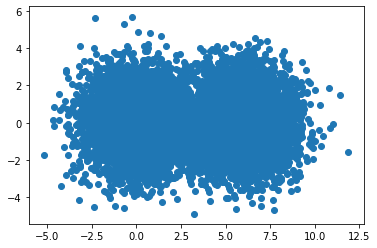

In [751]:
np.random.seed(0)
mean = 0
variance = 2
x = np.random.normal(mean, variance ** 0.5)
y = np.random.normal(mean, variance ** 0.5)
np.random.seed(1)
bulls_eye1 = [0, 0]
bulls_eye2 = [6, 0]
bulls_eyes = [bulls_eye1, bulls_eye2]
x_coordinates, y_coordinates = [], []
for bulls_eye in bulls_eyes:
    for _ in range(5000):
        x = np.random.normal(bulls_eye[0], variance ** 0.5)
        y = np.random.normal(bulls_eye[1], variance ** 0.5)
        x_coordinates.append(x)
        y_coordinates.append(y)

plt.scatter(x_coordinates, y_coordinates)
plt.show()

In [752]:
from scipy.spatial.distance import euclidean
def nearest_bulls_eye(dart):
    distances = [euclidean(dart, bulls_e) for bulls_e in bulls_eyes]
    return np.argmin(distances)

darts = [[0,1], [6, 1]]
for dart in darts:
    index = nearest_bulls_eye(dart)
    print(f"The dart at position {dart} is closest to bulls-eye {index}")

The dart at position [0, 1] is closest to bulls-eye 0
The dart at position [6, 1] is closest to bulls-eye 1


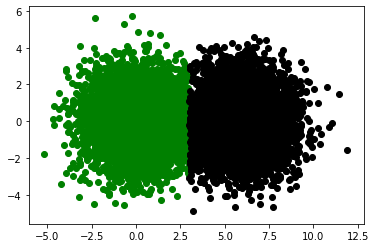

In [753]:
def color_by_cluster(darts):
    nearest_bulls_eyes = [nearest_bulls_eye(dart) for dart in darts]
    for bs_index in range(len(bulls_eyes)):
        selected_darts = [darts[i] for i in range(len(darts))
                          if bs_index == nearest_bulls_eyes[i]]
        x_coordinates, y_coordinates = np.array(selected_darts).T
        plt.scatter(x_coordinates, y_coordinates,
                    color=['g', 'k'][bs_index])
    plt.show()

darts = [[x_coordinates[i], y_coordinates[i]]
         for i in range(len(x_coordinates))]
color_by_cluster(darts)

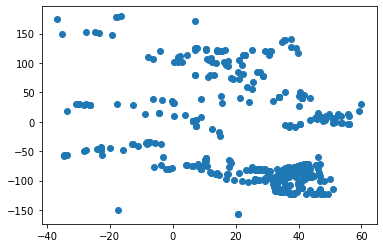

In [754]:
plt.scatter(pds.latitude, pds.longitude)
plt.show()

In [755]:
kmns  = KMeans()



X = np.array(pds[["latitude","longitude"]])
#y = np.array(dataframe['categoria'])
X.shape

XNUSA = np.array(pdsnusa[["latitude","longitude"]])
XUSA = np.array(pdsusa[["latitude","longitude"]])


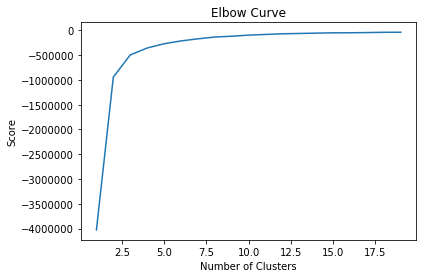

In [756]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()



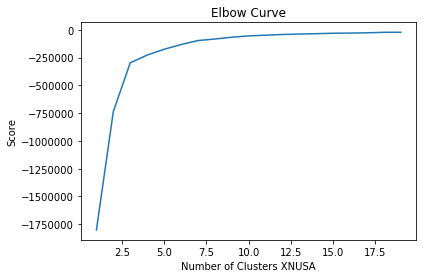

In [757]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(XNUSA).score(XNUSA) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters XNUSA')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

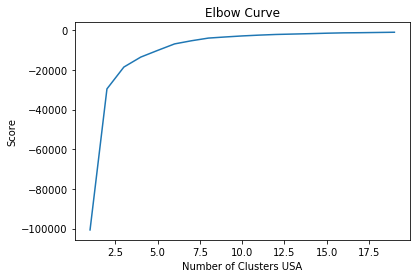

In [758]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(XUSA).score(XUSA) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters USA')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [759]:

kmeans = KMeans(n_clusters=3).fit(X)
kmeansnusa = KMeans(n_clusters=3).fit(XNUSA)
kmeansusa = KMeans(n_clusters=3).fit(XUSA)
centroids = kmeans.cluster_centers_
centroidsnusa = kmeansnusa.cluster_centers_
centroidsusa = kmeansusa.cluster_centers_
print(centroids)
print(centroids[0])
print(centroids[0][0])

[[ 11.93848235 115.00543654]
 [ 29.98327901 -89.13182358]
 [ 30.76059479  25.86918908]]
[ 11.93848235 115.00543654]
11.938482345679013


In [760]:
labels = kmeans.predict(X)
labelsnusa = kmeansnusa.predict(XNUSA)
labelsusa = kmeansusa.predict(XUSA)
#labelsusa = kmeansusa.predict(pdsusa[["latitude","longitude"]])

# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue']

In [761]:
#labelsusa = kmeansusa.predict(pdsusa[["latitude","longitude"]])

In [762]:
labelsusa

array([1, 1, 0, 1, 1, 0, 0, 0, 2, 1, 0, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1,
       0, 1, 1, 2, 2, 0, 0, 1, 1, 1, 0, 2, 0, 1, 0, 2, 1, 1, 1, 2, 1, 0,
       2, 1, 1, 0, 1, 0, 2, 0, 0, 2, 0, 2, 0, 0, 1, 2, 2, 2, 1, 0, 1, 1,
       2, 1, 0, 1, 2, 2, 2, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 2, 1, 1,
       0, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 0, 2, 1, 1, 1, 2, 2, 0, 0, 0,
       1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 0, 1, 2, 0, 1, 2, 2, 2, 1, 0, 1, 2,
       0, 1, 2, 2, 0, 1, 0, 2, 1, 2, 2, 1, 1, 1, 0, 2, 1, 1, 1, 2, 2, 1,
       2, 1, 0, 2, 0, 0, 0, 1, 1, 1, 0, 2, 2, 0, 0, 1, 1, 0, 2, 1, 1, 0,
       2, 0, 1, 1, 1, 0, 1, 0, 2, 0, 1, 2, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 2, 2, 1, 0, 0, 2, 2, 1, 1, 2, 1, 0, 1, 2, 0, 2, 1, 0, 0, 0,
       0, 2, 2, 2, 1, 0, 0, 1, 2, 1, 1, 1, 2, 2, 2, 0, 1, 1, 2, 1, 0, 1,
       1, 2, 2, 0, 0, 2, 0, 0, 1, 1, 1, 2, 1, 0, 2, 0, 2, 0, 1, 1, 2, 1,
       1, 1, 1, 2, 0, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0])

In [763]:
pdsusa["labelssc"] = labelsusa

C:\Users\Roland\anaconda3\envs\discovering-disease-outbreaks\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [764]:
pdsnusa["labelssc"] = labelsnusa

C:\Users\Roland\anaconda3\envs\discovering-disease-outbreaks\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [765]:
labelsusa

array([1, 1, 0, 1, 1, 0, 0, 0, 2, 1, 0, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1,
       0, 1, 1, 2, 2, 0, 0, 1, 1, 1, 0, 2, 0, 1, 0, 2, 1, 1, 1, 2, 1, 0,
       2, 1, 1, 0, 1, 0, 2, 0, 0, 2, 0, 2, 0, 0, 1, 2, 2, 2, 1, 0, 1, 1,
       2, 1, 0, 1, 2, 2, 2, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 2, 1, 1,
       0, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 0, 2, 1, 1, 1, 2, 2, 0, 0, 0,
       1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 0, 1, 2, 0, 1, 2, 2, 2, 1, 0, 1, 2,
       0, 1, 2, 2, 0, 1, 0, 2, 1, 2, 2, 1, 1, 1, 0, 2, 1, 1, 1, 2, 2, 1,
       2, 1, 0, 2, 0, 0, 0, 1, 1, 1, 0, 2, 2, 0, 0, 1, 1, 0, 2, 1, 1, 0,
       2, 0, 1, 1, 1, 0, 1, 0, 2, 0, 1, 2, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 2, 2, 1, 0, 0, 2, 2, 1, 1, 2, 1, 0, 1, 2, 0, 2, 1, 0, 0, 0,
       0, 2, 2, 2, 1, 0, 0, 1, 2, 1, 1, 1, 2, 2, 2, 0, 1, 1, 2, 1, 0, 1,
       1, 2, 2, 0, 0, 2, 0, 0, 1, 1, 1, 2, 1, 0, 2, 0, 2, 0, 1, 1, 2, 1,
       1, 1, 1, 2, 0, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0])

In [766]:
asignar=[]
for row in labels:
    asignar.append(colores[row])

asignarnusa=[]
for row in labelsnusa:
    asignarnusa.append(colores[row])
    
asignarusa=[]
for row in labelsusa:
    asignarusa.append(colores[row])

In [767]:
labelsusa

array([1, 1, 0, 1, 1, 0, 0, 0, 2, 1, 0, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1,
       0, 1, 1, 2, 2, 0, 0, 1, 1, 1, 0, 2, 0, 1, 0, 2, 1, 1, 1, 2, 1, 0,
       2, 1, 1, 0, 1, 0, 2, 0, 0, 2, 0, 2, 0, 0, 1, 2, 2, 2, 1, 0, 1, 1,
       2, 1, 0, 1, 2, 2, 2, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 2, 1, 1,
       0, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 0, 2, 1, 1, 1, 2, 2, 0, 0, 0,
       1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 0, 1, 2, 0, 1, 2, 2, 2, 1, 0, 1, 2,
       0, 1, 2, 2, 0, 1, 0, 2, 1, 2, 2, 1, 1, 1, 0, 2, 1, 1, 1, 2, 2, 1,
       2, 1, 0, 2, 0, 0, 0, 1, 1, 1, 0, 2, 2, 0, 0, 1, 1, 0, 2, 1, 1, 0,
       2, 0, 1, 1, 1, 0, 1, 0, 2, 0, 1, 2, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 2, 2, 1, 0, 0, 2, 2, 1, 1, 2, 1, 0, 1, 2, 0, 2, 1, 0, 0, 0,
       0, 2, 2, 2, 1, 0, 0, 1, 2, 1, 1, 1, 2, 2, 2, 0, 1, 1, 2, 1, 0, 1,
       1, 2, 2, 0, 0, 2, 0, 0, 1, 1, 1, 2, 1, 0, 2, 0, 2, 0, 1, 1, 2, 1,
       1, 1, 1, 2, 0, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0])

In [768]:
#pdsusa[:,"labelssc"] = labelsusa.labels_

In [769]:
pdsusa

,headline,countries,cities,latitude,longitude,countrycode,disease,labelssc
0,Zika Outbreak Hits Miami,United States,Miami,25.77427,-80.19366,US,,1
1,Could Zika Reach New York City?,United States,New York City,40.71427,-74.00597,US,,1
6,Zika Concerns are Spreading in Houston,United States,Houston,29.76328,-95.36327,US,,0
8,The CDC in Atlanta is Growing Worried,United States,Atlanta,33.74900,-84.38798,US,,1
10,Brownsville teen contracts Zika virus,United States,Brownsville,40.66094,-73.92014,US,,1
11,Mosquito control efforts in St. Louis take new...,United States,St. Louis,38.62727,-90.19789,US,,0
12,San Juan reports 1st U.S. Zika-related death a...,United States,San Juan,26.18924,-98.15529,US,,0
13,"Flu outbreak in Galveston, Texas",United States,Galveston,29.30135,-94.79770,US,,0
16,New Los Angeles Hairstyle goes Viral,United States,Los Angeles,34.05223,-118.24368,US,,2
17,Orlando volunteers aid Zika research,United States,Orlando,28.53834,-81.37924,US,,1


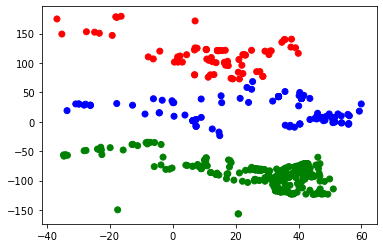

In [770]:
plt.scatter(pds.latitude, pds.longitude,c=asignar)
plt.show()

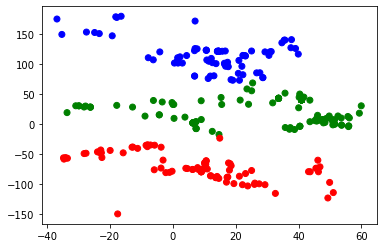

In [771]:
plt.scatter(pdsnusa.latitude, pdsnusa.longitude,c=asignarnusa)
plt.show()

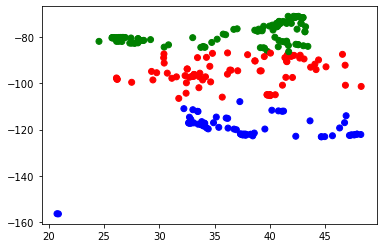

In [772]:
plt.scatter(pdsusa.latitude, pdsusa.longitude,c=asignarusa)
plt.show()

In [773]:
# map = Basemap(projection='ortho', 
#               lat_0=centroids[1][0], lon_0=centroids[1][1])
map = Basemap(
              lat_0=centroids[2][0], lon_0=centroids[2][1])
map2 = Basemap(
              lat_0=centroids[1][0], lon_0=centroids[1][1])

In [774]:
#pds.longitude.to_numpy()

In [775]:
xa, xy  = map(pds.longitude.to_numpy(), pds.latitude.to_numpy())
xausa, xyusa  = map2(pdsusa.longitude.to_numpy(), pdsusa.latitude.to_numpy())
xanusa, xynusa  = map(pdsnusa.longitude.to_numpy(), pdsnusa.latitude.to_numpy())

In [776]:
#xa

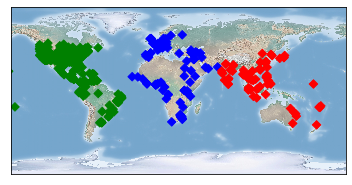

In [777]:
#map.drawmapboundary(fill_color='aqua')
#map.fillcontinents(color='coral',lake_color='aqua')
#map.drawcoastlines()
map.scatter(xa,xy ,marker='D',c=asignar)
map.shadedrelief()
plt.show()

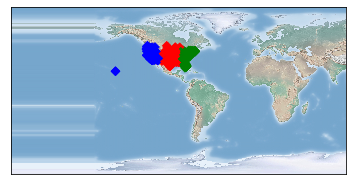

In [778]:
map2.scatter(xausa,xyusa ,marker='D',c=asignarusa)
map2.shadedrelief()
plt.show()

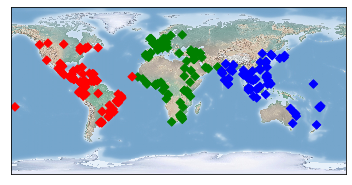

In [779]:
map.scatter(xanusa,xynusa ,marker='D',c=asignarnusa)
map.shadedrelief()
plt.show()

In [780]:
kmeansnusa

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [781]:
dfasignarnusa=pd.DataFrame(asignarnusa, columns=['a']) 
dfasignarusa=pd.DataFrame(asignarusa, columns=['a']) 

In [782]:
dfasignarnusa['a'].value_counts()


green    162
red       88
blue      81
Name: a, dtype: int64

In [783]:
dfasignarusa['a'].value_counts()

green    123
red       84
blue      78
Name: a, dtype: int64

In [784]:
print(centroids)

[[ 11.93848235 115.00543654]
 [ 29.98327901 -89.13182358]
 [ 30.76059479  25.86918908]]


In [785]:
print(centroidsnusa)

[[  6.9736183  -71.00030273]
 [ 30.85830512  26.17401457]
 [ 11.93848235 115.00543654]]


In [786]:
print(centroidsusa)

[[  37.02943107  -95.07094548]
 [  36.64868951  -78.18251455]
 [  37.65092154 -119.61686615]]


In [787]:
pdsusa

,headline,countries,cities,latitude,longitude,countrycode,disease,labelssc
0,Zika Outbreak Hits Miami,United States,Miami,25.77427,-80.19366,US,,1
1,Could Zika Reach New York City?,United States,New York City,40.71427,-74.00597,US,,1
6,Zika Concerns are Spreading in Houston,United States,Houston,29.76328,-95.36327,US,,0
8,The CDC in Atlanta is Growing Worried,United States,Atlanta,33.74900,-84.38798,US,,1
10,Brownsville teen contracts Zika virus,United States,Brownsville,40.66094,-73.92014,US,,1
11,Mosquito control efforts in St. Louis take new...,United States,St. Louis,38.62727,-90.19789,US,,0
12,San Juan reports 1st U.S. Zika-related death a...,United States,San Juan,26.18924,-98.15529,US,,0
13,"Flu outbreak in Galveston, Texas",United States,Galveston,29.30135,-94.79770,US,,0
16,New Los Angeles Hairstyle goes Viral,United States,Los Angeles,34.05223,-118.24368,US,,2
17,Orlando volunteers aid Zika research,United States,Orlando,28.53834,-81.37924,US,,1


In [788]:
pd.concat([pdsusa,dfasignarusa],axis=1, ignore_index=True)


,0,1,2,3,4,5,6,7,8
0,Zika Outbreak Hits Miami,United States,Miami,25.77427,-80.19366,US,,1.0,green
1,Could Zika Reach New York City?,United States,New York City,40.71427,-74.00597,US,,1.0,green
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,red
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,green
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,green
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,red
6,Zika Concerns are Spreading in Houston,United States,Houston,29.76328,-95.36327,US,,0.0,red
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,red
8,The CDC in Atlanta is Growing Worried,United States,Atlanta,33.74900,-84.38798,US,,1.0,blue
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,green


In [789]:
asignarusa

['green',
 'green',
 'red',
 'green',
 'green',
 'red',
 'red',
 'red',
 'blue',
 'green',
 'red',
 'green',
 'green',
 'green',
 'green',
 'red',
 'blue',
 'green',
 'blue',
 'green',
 'blue',
 'green',
 'red',
 'green',
 'green',
 'blue',
 'blue',
 'red',
 'red',
 'green',
 'green',
 'green',
 'red',
 'blue',
 'red',
 'green',
 'red',
 'blue',
 'green',
 'green',
 'green',
 'blue',
 'green',
 'red',
 'blue',
 'green',
 'green',
 'red',
 'green',
 'red',
 'blue',
 'red',
 'red',
 'blue',
 'red',
 'blue',
 'red',
 'red',
 'green',
 'blue',
 'blue',
 'blue',
 'green',
 'red',
 'green',
 'green',
 'blue',
 'green',
 'red',
 'green',
 'blue',
 'blue',
 'blue',
 'red',
 'green',
 'green',
 'red',
 'red',
 'green',
 'green',
 'green',
 'red',
 'red',
 'green',
 'red',
 'blue',
 'green',
 'green',
 'red',
 'green',
 'green',
 'green',
 'blue',
 'green',
 'blue',
 'green',
 'green',
 'blue',
 'blue',
 'blue',
 'red',
 'blue',
 'green',
 'green',
 'green',
 'blue',
 'blue',
 'red',
 'red',
 'r

In [790]:
XNUSA

array([[ 4.0940550e+01,  4.0259180e+01],
       [-8.0538900e+00, -3.4881110e+01],
       [ 7.4125100e+00, -7.5538300e+00],
       [-3.3516500e+01, -5.6899570e+01],
       [ 4.6202220e+01,  6.1456900e+00],
       [-2.3547500e+01, -4.6636110e+01],
       [ 1.4604200e+01,  1.2098220e+02],
       [ 1.0696940e+01,  1.2256444e+02],
       [ 1.4183680e+01,  1.2128554e+02],
       [ 5.1508530e+01, -1.2574000e-01],
       [ 1.0823020e+01,  1.0662965e+02],
       [ 1.3753980e+01,  1.0050144e+02],
       [ 3.9907500e+01,  1.1639723e+02],
       [-1.2971110e+01, -3.8510830e+01],
       [ 3.3636640e+01,  4.2827680e+01],
       [ 1.6805280e+01,  9.6156110e+01],
       [-1.9266390e+01,  1.4680569e+02],
       [ 1.4583200e+01,  1.2104090e+02],
       [ 1.3689350e+01, -8.9187180e+01],
       [-2.2725280e+01, -4.7649170e+01],
       [ 4.3700110e+01, -7.9416300e+01],
       [ 4.6097100e+00, -7.4081750e+01],
       [-2.7467940e+01,  1.5302809e+02],
       [ 1.4693700e+01, -1.7444060e+01],
       [ 2.31330

In [791]:
# A toy DF
Xtest = pd.DataFrame({'id': [1,2,3,4,5],
                  'value_1': [1,3,1,4,5],
                  'value_2': [0,0,1,5,0]})

# Split ALL columns
(X_train, X_test) = train_test_split(Xtest,test_size=0.30)
# Cluster using SOME columns
kmeanstest = kmeans.fit(X_train[['value_1','value_2']])
# Save the labels
X_train.loc[:,'labels'] = kmeanstest.labels_

C:\Users\Roland\anaconda3\envs\discovering-disease-outbreaks\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Roland\anaconda3\envs\discovering-disease-outbreaks\lib\site-packages\pandas\core\indexing.py:480: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [792]:
X_train

,id,value_1,value_2,labels
3,4,4,5,2
4,5,5,0,0
2,3,1,1,1


In [793]:
kmeanstest.labels_

array([2, 0, 1])

In [794]:
pdsusa[['latitude','longitude']]

,latitude,longitude
0,25.77427,-80.19366
1,40.71427,-74.00597
6,29.76328,-95.36327
8,33.74900,-84.38798
10,40.66094,-73.92014
11,38.62727,-90.19789
12,26.18924,-98.15529
13,29.30135,-94.79770
16,34.05223,-118.24368
17,28.53834,-81.37924


In [795]:
Xtest

,id,value_1,value_2
0,1,1,0
1,2,3,0
2,3,1,1
3,4,4,5
4,5,5,0


In [796]:
latxusa = pdsusa.groupby('labelssc')['latitude'].mean()
latxnusa = pdsnusa.groupby('labelssc')['latitude'].mean()

In [797]:
#pdsusa.sort_values(by=['labelssc', 'distance'])
#pdsusa

In [798]:
latxusa

labelssc
0    37.029431
1    36.648690
2    37.650922
Name: latitude, dtype: float64

In [799]:
longxusa=pdsusa.groupby('labelssc')['longitude'].mean()
longxnusa=pdsnusa.groupby('labelssc')['longitude'].mean()

In [800]:
longxusa

labelssc
0    -95.070945
1    -78.182515
2   -119.616866
Name: longitude, dtype: float64

In [801]:
print(centroidsusa)

[[  37.02943107  -95.07094548]
 [  36.64868951  -78.18251455]
 [  37.65092154 -119.61686615]]


In [802]:
pdsusa

,headline,countries,cities,latitude,longitude,countrycode,disease,labelssc
0,Zika Outbreak Hits Miami,United States,Miami,25.77427,-80.19366,US,,1
1,Could Zika Reach New York City?,United States,New York City,40.71427,-74.00597,US,,1
6,Zika Concerns are Spreading in Houston,United States,Houston,29.76328,-95.36327,US,,0
8,The CDC in Atlanta is Growing Worried,United States,Atlanta,33.74900,-84.38798,US,,1
10,Brownsville teen contracts Zika virus,United States,Brownsville,40.66094,-73.92014,US,,1
11,Mosquito control efforts in St. Louis take new...,United States,St. Louis,38.62727,-90.19789,US,,0
12,San Juan reports 1st U.S. Zika-related death a...,United States,San Juan,26.18924,-98.15529,US,,0
13,"Flu outbreak in Galveston, Texas",United States,Galveston,29.30135,-94.79770,US,,0
16,New Los Angeles Hairstyle goes Viral,United States,Los Angeles,34.05223,-118.24368,US,,2
17,Orlando volunteers aid Zika research,United States,Orlando,28.53834,-81.37924,US,,1


In [803]:
pdsusa['distance'] = 0.0
for index,row in pdsusa.iterrows():
    #print(index)
    latpdx = row["latitude"]
    longpdx = row["longitude"]
    latcenterpdx = latxusa[int(row["labelssc"])]
    longcenterpdx = longxusa[int(row["labelssc"])]
    distamce = great_circle_distance(longpdx,latpdx,longcenterpdx,latcenterpdx)
    #print(distamce)
    pdsusa.at[index,"distance"] = 3956 * distamce

C:\Users\Roland\anaconda3\envs\discovering-disease-outbreaks\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [804]:
pdsusa

,headline,countries,cities,latitude,longitude,countrycode,disease,labelssc,distance
0,Zika Outbreak Hits Miami,United States,Miami,25.77427,-80.19366,US,,1,7956.091389
1,Could Zika Reach New York City?,United States,New York City,40.71427,-74.00597,US,,1,8333.870824
6,Zika Concerns are Spreading in Houston,United States,Houston,29.76328,-95.36327,US,,0,1156.435816
8,The CDC in Atlanta is Growing Worried,United States,Atlanta,33.74900,-84.38798,US,,1,307.459766
10,Brownsville teen contracts Zika virus,United States,Brownsville,40.66094,-73.92014,US,,1,7994.327344
11,Mosquito control efforts in St. Louis take new...,United States,St. Louis,38.62727,-90.19789,US,,0,5578.473611
12,San Juan reports 1st U.S. Zika-related death a...,United States,San Juan,26.18924,-98.15529,US,,0,12201.666936
13,"Flu outbreak in Galveston, Texas",United States,Galveston,29.30135,-94.79770,US,,0,1080.959104
16,New Los Angeles Hairstyle goes Viral,United States,Los Angeles,34.05223,-118.24368,US,,2,5432.324425
17,Orlando volunteers aid Zika research,United States,Orlando,28.53834,-81.37924,US,,1,12210.035206


In [805]:
pdsusa['distance'] = 0.0
for index,row in pdsnusa.iterrows():
    #print(index)
    latpdx = row["latitude"]
    longpdx = row["longitude"]
    latcenterpdx = latxnusa[int(row["labelssc"])]
    longcenterpdx = longxnusa[int(row["labelssc"])]
    distamce = great_circle_distance(longpdx,latpdx,longcenterpdx,latcenterpdx)
    #print(distamce)
    pdsnusa.at[index,"distance"] = 3956 * distamce

C:\Users\Roland\anaconda3\envs\discovering-disease-outbreaks\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [806]:
for index,row in pdsusa.iterrows():
    #print(index)    
    for regex in arrDiseasesRe:
        #print(row["headline"])
        #localmatch = regex.search(row["headline"])
        localmatch = regex.search(row["headline"])
        if localmatch is not None:
            print(localmatch.group(0))
            pdsusa.set_value(index,'disease',localmatch.group(0))
            #print(row["headline"])
            #print(regex)
        
    

C:\Users\Roland\anaconda3\envs\discovering-disease-outbreaks\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':


Zika
Zika
Zika
Zika
Zika
Zika
Flu
Zika
Zika
Zika
Flu
Zika
Zika
Zika
Hepatitis E
Zika
Zika
Zika
Zika
Measles
Zika
Zika
Zika
Zika
Mad Cow
Dengue
Zika
Syncytial
Zika
Hepatitis E
Zika
Rabies
Rabies
HIV
Hepatitis C
Zika
Zika
West Nile
Zika
Zika
Zika
Zika
Zika
Hepatitis D
West Nile
Hepatitis B
Zika
Rhinovirus
Rotavirus
Rhinovirus
Measles
Zika
Zika
Influenza
Dengue
Varicella
HIV
Dengue
Norovirus
Gonorrhea
Dengue
Measles
Zika
Chikungunya
Hepatitis B
Chickenpox
Chikungunya
Zika
Zika
Syphilis
Zika
Norovirus
Chikungunya
HIV
Tuberculosis
Mad Cow
Zika
Mad Cow
HIV
Zika
Zika
Zika
Hepatitis C
Chickenpox
Syphilis
HIV
Zika
Zika
Rhinovirus
Hepatitis D
Rabies
Zika
Malaria
Measles
Hepatitis B
Hepatitis A
Tuberculosis
Zika
Zika
Zika
Pneumonia
Zika
Zika
Mad Cow
Chickenpox
Zika
Chlamydia
Flu
Tuberculosis
Mumps
Syncytial
Norovirus
Syncytial
Rotavirus
Mad Cow
Zika
Bronchitis
West Nile
Zika
Zika
Herpes
Pneumonia
Pneumonia
Pneumonia
Syphilis
Zika
Mumps
Mad Cow
Hepatitis B
Malaria
Hepatitis B
West Nile
Zika
Chicke

In [807]:
for index,row in pdsnusa.iterrows():
    #print(index)    
    for regex in arrDiseasesRe:
        #print(row["headline"])
        #localmatch = regex.search(row["headline"])
        localmatch = regex.search(row["headline"])
        if localmatch is not None:
            print(localmatch.group(0))
            pdsnusa.set_value(index,'disease',localmatch.group(0))
            #print(row["headline"])
            #print(regex)

Zika
Zika
Zika
Zika
Zika
Zika
Zika
Mad Cow
Zika
Zika
Zika
Zika
Zika
Zika
Zika

C:\Users\Roland\anaconda3\envs\discovering-disease-outbreaks\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':



Zika
Zika
Hepatitis E
Zika
Zika
Zika
Gonorrhea
Zika
Rabies
Zika
Zika
Zika
Malaria
Zika
Syncytial
Zika
Zika
Zika
Bronchitis
Zika
Zika
Zika
Zika
Hepatitis B
Zika
Zika
Zika
Zika
Zika
Zika
Tuberculosis
Zika
Zika
Zika
Zika
Zika
Zika
Malaria
Norovirus
Flu
Influenza
Zika
Zika
Zika
Flu
Zika
Zika
Zika
Zika
Zika
Norovirus
Zika
Pneumonia
Zika
Syncytial
Pneumonia
Tuberculosis
Measles
Zika
Zika
Zika
Zika
Zika
Mumps
Rotavirus
Bronchitis
Zika
Zika
Zika
Hepatitis D
Zika
Hepatitis E
Norovirus
Chikungunya
Zika
Syncytial
Zika
Zika
Chikungunya
Zika
Dengue
Bronchitis
Chlamydia
Rotavirus
Zika
Varicella
Chlamydia
Zika
Mad Cow
Norovirus
Hepatitis A
Flu
Bronchitis
Mad Cow
Mad Cow
Mumps
Zika
Zika
Gonorrhea
Measles
Chikungunya
Mumps
HIV
Hepatitis A
Zika
Zika
Zika
Rhinovirus
West Nile
Tuberculosis
Dengue
Zika
Zika
Zika
Zika
Varicella
Herpes
Zika
Flu
Zika
Zika
West Nile
Rabies
Hepatitis B
flu
Rabies
Chlamydia
Rotavirus
Tuberculosis
Rhinovirus
Chickenpox
Chikungunya
Hepatitis D
West Nile
Zika
HIV
Pneumonia
Zika
Ro

In [808]:
countdisusa = pdsusa.groupby(['labelssc','disease']).agg([ 'count'])

In [809]:
countdisusa

headline countries cities latitude longitude  \
                         count     count  count    count     count   
labelssc disease                                                     
0                            3         3      3        3         3   
         Bronchitis          1         1      1        1         1   
         Chickenpox          2         2      2        2         2   
         Chikungunya         1         1      1        1         1   
         Chlamydia           2         2      2        2         2   
...                        ...       ...    ...      ...       ...   
2        Syncytial           4         4      4        4         4   
         Syphilis            1         1      1        1         1   
         Tuberculosis        4         4      4        4         4   
         West Nile           5         5      5        5         5   
         Zika               12        12     12       12        12   

                      countrycode distance  
                            count    count  
labelssc disease                            
0                               3        3  
         Bronchitis             1        1  
         Chickenpox             2        2  
         Chikungunya            1        1  
         Chlamydia              2        2  
...                           ...      ...  
2        Syncytial              4        4  
         Syphilis               1        1  
         Tuberculosis           4        4  
         West Nile              5        5  
         Zika                  12       12  

[87 rows x 7 columns]

In [810]:
len(pdsusa)

285

In [811]:
countdisnusa = pdsnusa.groupby(['labelssc','disease']).agg([ 'count'])

In [812]:
countdisnusa

headline countries cities latitude longitude  \
                         count     count  count    count     count   
labelssc disease                                                     
0                            5         5      5        5         5   
         Bronchitis          1         1      1        1         1   
         Chikungunya         1         1      1        1         1   
         Dengue              1         1      1        1         1   
         Flu                 2         2      2        2         2   
...                        ...       ...    ...      ...       ...   
2        Syphilis            1         1      1        1         1   
         Tuberculosis        2         2      2        2         2   
         Varicella           1         1      1        1         1   
         West Nile           3         3      3        3         3   
         Zika               49        49     49       49        49   

                      countrycode distance  
                            count    count  
labelssc disease                            
0                               5        5  
         Bronchitis             1        1  
         Chikungunya            1        1  
         Dengue                 1        1  
         Flu                    2        2  
...                           ...      ...  
2        Syphilis               1        1  
         Tuberculosis           2        2  
         Varicella              1        1  
         West Nile              3        3  
         Zika                  49       49  

[72 rows x 7 columns]

In [813]:
pdsusarep = pdsusa[pdsusa["disease"]=="Zika"]
pdsnusarep= pdsnusa[pdsnusa["disease"]=="Zika"]

In [814]:
print(len(pdsnusarep))
asignarnusarep=[]
for index,row in pdsnusarep.iterrows():
    asignarnusarep.append(colores[row["labelssc"]])
print(len(pdsusarep)    )
asignarusarep=[]
for index,row in pdsusarep.iterrows():
    asignarusa.append(colores[row["labelssc"]])

133
83


In [815]:

xausarep, xyusarep  = map2(pdsusarep.longitude.to_numpy(), pdsusarep.latitude.to_numpy())
xanusarep, xynusarep  = map(pdsnusarep.longitude.to_numpy(), pdsnusarep.latitude.to_numpy())

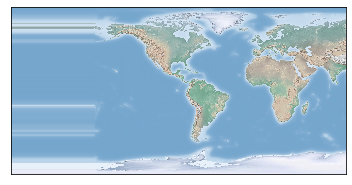

In [816]:
map2.scatter(xausarep,xyusarep ,marker='D',c=asignarusarep)
map2.shadedrelief()
plt.show()

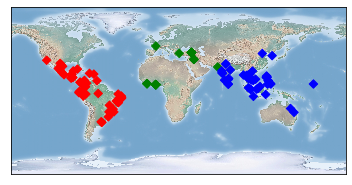

In [817]:
map.scatter(xanusarep,xynusarep ,marker='D',c=asignarnusarep)
map.shadedrelief()
plt.show()